# **Welcome to Machine Learning**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

 EDA (Exploratory Data Analysis)

- -> null values
- -> duplicates values
- -> unwanted data or data columns
- -> outliers (find and remove)
- -> label encoding
- -> Standardization (if necessary)
- -> Feature/column selection
- -> building model


## Linear Regression

In [3]:
# Import the required dataset
df_boston = pd.read_csv(r'D:\Intellipaat\Datasets\Boston.csv')
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Columns info :-

**crim** :- per capita crime rate by town.

**zn** :- proportion of residential land zoned for lots over 25,000 sq.ft.

**indus** :- proportion of non-retail business acres per town.

**chas** :- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

**nox** :- nitrogen oxides concentration (parts per 10 million).

**rm** :- average number of rooms per dwelling.

**age** :- proportion of owner-occupied units built prior to 1940.

**dis** :- weighted mean of distances to five Boston employment centres.

**rad** :- index of accessibility to radial highways.

**tax** :- full-value property-tax rate per $10,000.

**ptratio** :- pupil-teacher ratio by town.

**black** :- 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

**lstat** :- lower status of the population (percent).

**medv** :- median value of owner-occupied homes in $1000s.

In [4]:
# Overview info of data
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Note :- 
- First of all perform EDA (Exploratory Data Analysis), we are not doing because this is ready made dataset 
  for practice & it doesn't have any null values or an outliers.

## Simple Linear Regression (One independent variable)

In [5]:
data = df_boston[['lstat', 'medv']]
data.head()

,lstat,medv
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


Here, 
dependent variable ( y )    :- medv (median price of owner occupied house)
independent variable ( x1 ) :- lstat (% of population in lower status)

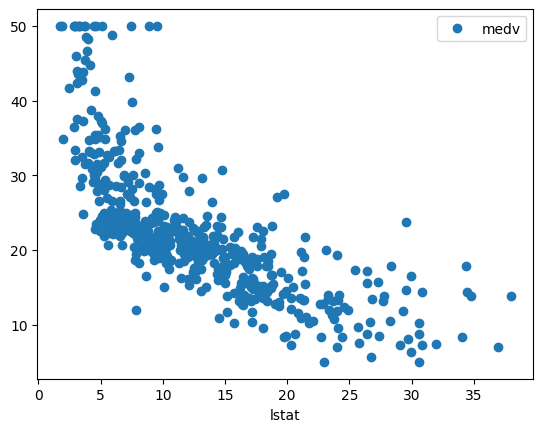

In [6]:
# plot the graph to see if their is linear relationship 
data.plot(x='lstat', y='medv', style='o')
plt.show()

In [7]:
# correlation between both varibles
data.corr()

,lstat,medv
lstat,1.000000,-0.737663
medv,-0.737663,1.000000


Here, the both variable has the highest correlation.<br/>
Higher correlation -> ( _ < -0.7 or 0.7 > _ )<br/><br/>
In this case, the correlation matrix show that,<br/>
- if the 'lstat'(lower status) increases then 'medv'(price of house) decreases or vice versa.

Explaination :- Suppose if the lower status of people in our society is increases then automatically the price of 
                the house they occupy will decrease.

In [8]:
# Spliting the data (training data & testing data)
from sklearn.model_selection import train_test_split

Input :- 
The "train_test_split" will take 4 inputs that is,
1. independent variables i.e. X
2. dependent variable i.e. y
3. test_size (0.2),it indicates the 80:20 split which means 80% data for training & 20% data for testing
4. random_state = int value   
    It controls the shuffling applied to the data. simply used for data to remain constant<br/>
    like if you didn't use random_state the data will change everytime you execute,<br/>
    in use case random_state prevent data from being changed. 

<br/>

Output :- 

    The "train_test_split" will return the 4 outputs that is,
    1. X_train
    2. X_test
    3. y_train
    4. y_test

In [9]:
# Get the X(DF of independent variables) & Y(DF of dependent variables)

X = pd.DataFrame(data['lstat'])
y = pd.DataFrame(data['medv'])

In [10]:
# check the size of variable (both should be same)
X.size, y.size

(506, 506)

In [11]:
# Get the train & test data from train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.head()

,lstat
42,5.81
58,6.86
385,30.81
78,12.34
424,17.16


In [12]:
# Check whether the shape of both train & test data are equal or not
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [13]:
# import linear regression class
from sklearn.linear_model import LinearRegression
model = LinearRegression()      # model is an instance of Linear Regression class

In [14]:
# Fitting the model / Training the model
model.fit(X_train, y_train)

LinearRegression()

LR.fit() is the method inside the LR class & so in its instance (model in this case).

- This method will take 2 inputs that is, 'X_train & y_train' to train the model. <br/>

- Also it calculates the best fit(optimum) values of intercept (Beta 0) & coefficient (Beta 1, ....) in such <br/>
      manner that the error will be minimum and most of the X-train & y-train equation are satisfied

In [15]:
# Intercept
model.intercept_            # Beta 0

array([34.33497839])

In [16]:
# Coefficient
model.coef_                 # Beta 1

array([[-0.92441715]])

Here it means <br/>
y = Beta 0 + (Beta 1 * x1) <br/>
y = 34.33 + (-0.92 * x1) <br/>
<br/>
In case of x = 0,<br/>
y = intercept (Beta 0)

In [17]:
# Predict the y with the model
y_predicted = model.predict(X_test)        # predict() function is used to predict the values based on the
y_predicted[0:5]                           # training data

array([[27.37411725],
       [27.69766325],
       [16.95593597],
       [26.84719947],
       [24.91516763]])

In [18]:
# Analyze the predicted y with actual y
y_test.head(5)

,medv
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8


In [19]:
# Metrics
from sklearn import metrics

# MAE (Mean Absolute Error)
MAE = metrics.mean_absolute_error(y_test, y_predicted)

# MSE (Mean Squared Error)
MSE = metrics.mean_squared_error(y_test, y_predicted)

# RMSE (Root Mean Squared Error)
RMSE = metrics.root_mean_squared_error(y_test, y_predicted)

# Print the error values
print("MAE :", MAE)
print("MSE :", MSE)
print("RMSE :", RMSE)

MAE : 5.078127727696937
MSE : 46.994820919547124
RMSE : 6.855276866731724


Error in price is around 5.07 thousand dollar (unit is in thousand dollar) <br/>

Note :- Smaller the MAE/RMSE, better is your model.

In [20]:
# R^2_score (Coefficient of determination)
R2 = metrics.r2_score(y_test, y_predicted)              # For one ind variable (x1) R2 will be used.
print("R2_score :-",R2)
print(f"Accuracy of model :- {round(R2*100, 2)} %")

R2_score :- 0.5244757432765152
Accuracy of model :- 52.45 %


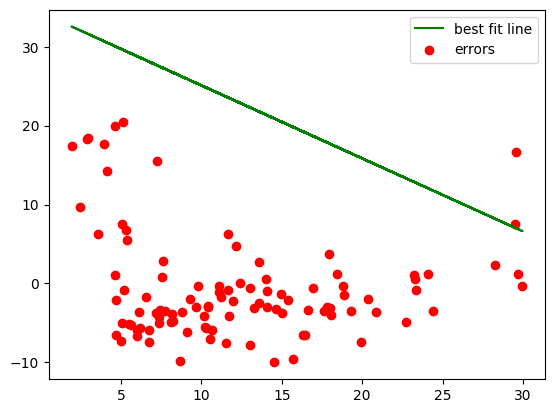

In [21]:
# Homoscedasticity
plt.plot(X_test, y_predicted, c = 'g', label = 'best fit line')
plt.scatter(X_test, y_test - y_predicted, c = 'r', label = 'errors')
plt.legend()
plt.show()

Here, <br/>
-  Green line is the best fit line got by the model, which shows the 'what will be my y_predicted value according
   to x_test value'.

- Red dots are the errors with respect to x/y <br/>
   Here we can see there is no pattern in the error, its neither increasing nor deceasing with respect to my x value <br/>
   or y value. Most of the errors are towards negative side but they are normally distributed so we can say it satisfies homoscedasticity.

END OF SIMPLE LINEAR REGRESSION

---

## Multiple Linear Regression (multiple independent variable)

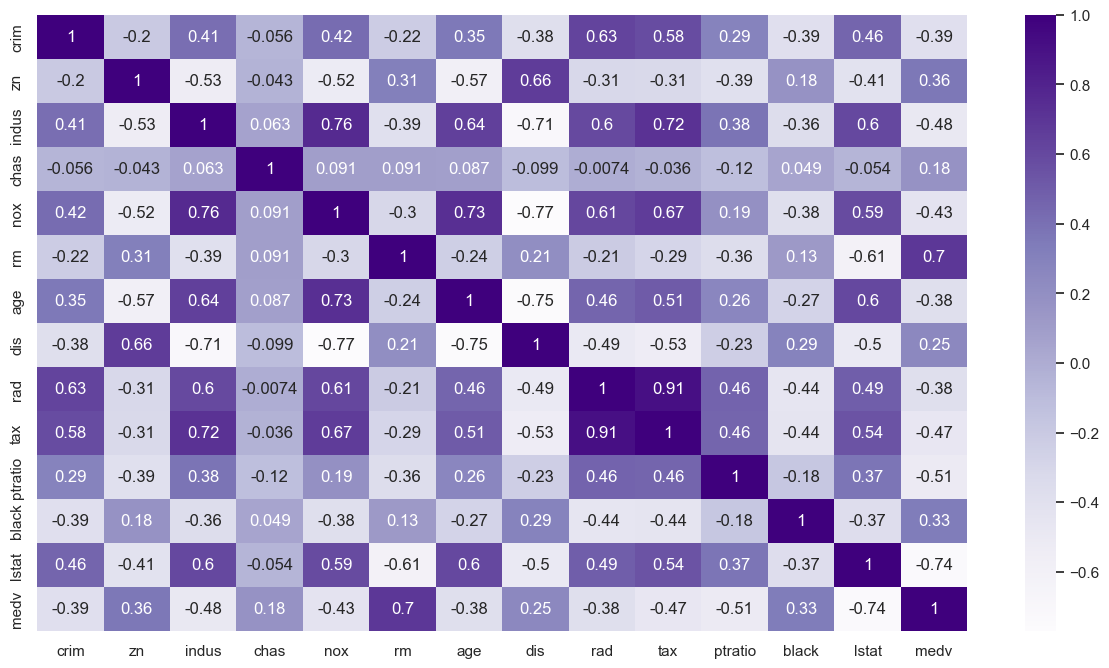

In [22]:
# Plot a heatmap to see which columns has high correlation with medv(target variable)       # ASSUMPTION 1
sns.set_theme(rc={'figure.figsize' : (15, 8)})
sns.heatmap(df_boston.corr(), cmap='Purples', annot=True)
plt.show()

Ideally we take columns having correlation either less than '-0.7' or greater than '0.7'.<br/>
After visualize this heatmap there are only 2 column near '+- 0.7' <br/>
So we also take indus, nox, rm, tax, plratio, medv

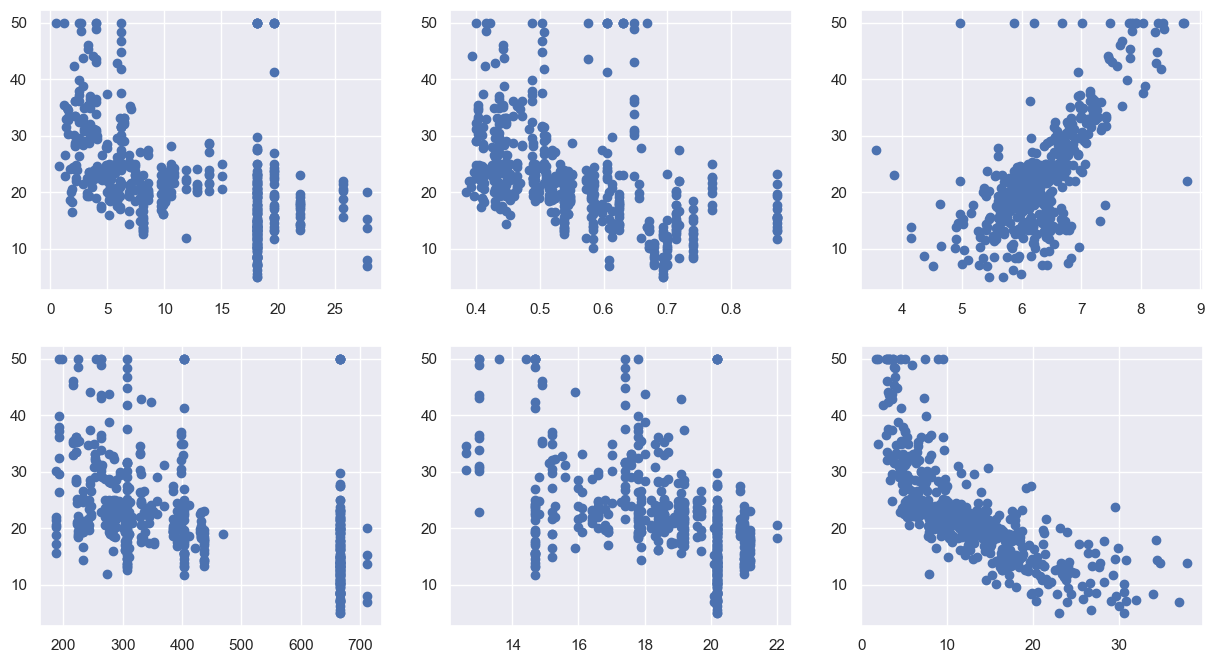

In [23]:
# Plot the scatter plot for all the decided columns from heatmap
plt.subplot(2, 3, 1)
plt.scatter(x='indus', y='medv', data=df_boston)
plt.subplot(2, 3, 2)
plt.scatter(x='nox', y='medv', data=df_boston)
plt.subplot(2, 3, 3)
plt.scatter(x='rm', y='medv', data=df_boston)
plt.subplot(2, 3, 4)
plt.scatter(x='tax', y='medv', data=df_boston)
plt.subplot(2, 3, 5)
plt.scatter(x='ptratio', y='medv', data=df_boston)
plt.subplot(2, 3, 6)
plt.scatter(x='lstat', y='medv', data=df_boston)
plt.show()

Here based on the scatter plot, <br/>
-  we will take 4 variables in consideration which are indus, nox, rm, lstat. <br/>
  'indus' & 'nox' has centain relationship present with medv, <br/>
   And 'rm' & 'lstat' are obviosly having higher correlation with medv so they are taken

-  we reject 'tax' & 'ptratio' because they doesn't make sense, means best fit line can't be drawn which explain <br/>
   the relationship between both variables

Note :- 
- Ideally we should select 'rm' & 'lstat', but we are forcefully taking 'indus' & 'nox' so that we can study linear regression with 4 variables.

In [25]:
# Now check for multicolinearity between the selected columns       # ASSUMPTION 2
df_boston[['indus', 'nox', 'rm', 'lstat']].corr()

,indus,nox,rm,lstat
indus,1.000000,0.763651,-0.391676,0.603800
nox,0.763651,1.000000,-0.302188,0.590879
rm,-0.391676,-0.302188,1.000000,-0.613808
lstat,0.603800,0.590879,-0.613808,1.000000


- Here we see 'indus' & 'nox' are highly correlated with each other, means they are linearly dependent on each <br/>
  other, so we are going to take one of them that is 'indus', because 'indus' has high correlation with the target  variable(medv).


- 'rm' & 'lstat' also have high correlation with each other, but we will ignore it for example pupose.
  ideally we should take only one of them (rm & lstat)


-  So our final set of variables are 'indus', 'rm', 'lstat'

In [26]:
# Get the X(DF of independent variables) & Y(DF of dependent variables)

X = pd.DataFrame(df_boston[['indus', 'rm', 'lstat']])
y = pd.DataFrame(df_boston['medv'])

In [27]:
# Spliting the data (training data & testing data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [28]:
# Check whether the shape of both train & test data are equal or not
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 3)
(102, 3)
(404, 1)
(102, 1)


In [29]:
# create an instance of LR class
model = LinearRegression()

In [30]:
# Fitting the model / Training the model
model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Intercept
model.intercept_            # Beta 0

array([0.93519243])

In [32]:
# Coefficient 
model.coef_                 # Beta 1, Beta 2, Beta 3

array([[-0.05143861,  4.8158014 , -0.64256625]])

Here it means 
y = Beta 0 + (Beta 1 * x1) + (Beta 2 * x2) + (Beta 3 * x3)
y = 0.94 + (-0.51 * x1) + (4.82 * x2) + (-0.64 * x3)

In [33]:
# Predict the value of y with the model
y_predicted = model.predict(X_test)
y_predicted[0:5]

array([[24.75746144],
       [16.27691815],
       [32.81638388],
       [28.76498174],
       [ 1.35776986]])

In [34]:
# Analyze the predicted_y with actual_y
y_test.head(5)

,medv
463,20.2
152,15.3
291,37.3
183,32.5
384,8.8


In [35]:
# Metrics

# MAE (Mean Absolute Error)
MAE = metrics.mean_absolute_error(y_test, y_predicted)

# MSE (Mean Squared Error)
MSE = metrics.mean_squared_error(y_test, y_predicted)

# RMSE (Root Mean Squared Error)
RMSE = metrics.root_mean_squared_error(y_test, y_predicted)

# Print the error values
print("MAE :", MAE)
print("MSE :", MSE)
print("RMSE :", RMSE)

MAE : 3.5761982123110148
MSE : 23.367460486350673
RMSE : 4.833990120630231


Error in price is around 3.57 thousand dollar (unit is in thousand dollar)

In [36]:
# R^2_score (Coefficient of determination)
R2 = metrics.r2_score(y_test, y_predicted)
print("R2_score :-",R2)
print(f"Accuracy of model :- {round(R2*100, 2)} %")

R2_score :- 0.7206843252479396
Accuracy of model :- 72.07 %


But R2_score may increase due to multiple variable, so we need to find 'Adjusted R2' for clarification.

In [37]:
# Needed for Adjusted R2
n = len(X_test)                     # Total no. of observation/rows
k = len(X_test.iloc[0])             # Total no. of independent variables

In [38]:
# Adjusted R^2   (used when there are multiple variables)
Adj_R2 = (1 - ((1 - R2)*(n - 1) / (n - k - 1)))
Adj_R2

0.7121338454085908

Here as we see, 'Adj_R2' is very close to 'R2', so we can say the accuracy is not because of the additional columns,<br/>
it is because the model is trained well.

- So the model is actually explaining the 72 % variance <br/>
- loosely we can interpret it 72 % accurate

And we have verified it with the help of R_square & Adjusted R_square

Note :- 
- If your model is good, your 'R_square' & Adjusted R_square both should be very very close to each other

END OF MULTIPLE LINEAR REGRESSION

---

## Logistic Regression

In [39]:
# Import the required dataset
df_heart = pd.read_csv(r'D:\Intellipaat\Datasets\Heart.csv')
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1


### Exploratory Data Analysis

In [40]:
# information of data
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  target    303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


In [41]:
# Check for the null values & remove if exist
df_heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
target      0
dtype: int64

In [42]:
# Check for duplicate records & remove if exist
df_heart.duplicated().sum()
df_heart.drop_duplicates(inplace=True)

In [43]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,1.000000


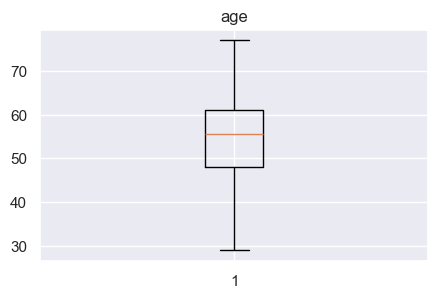

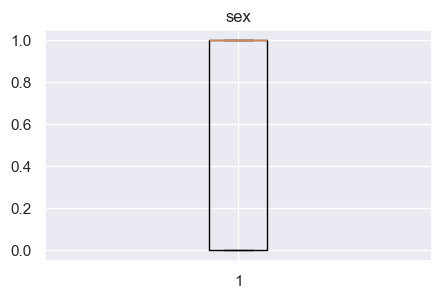

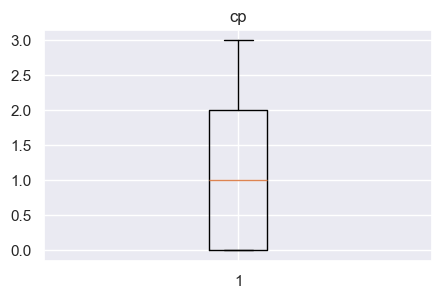

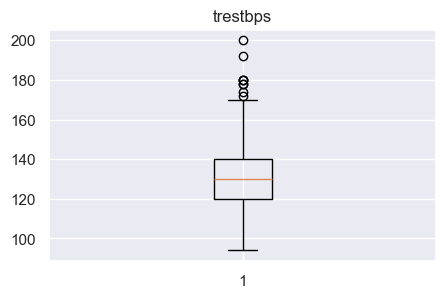

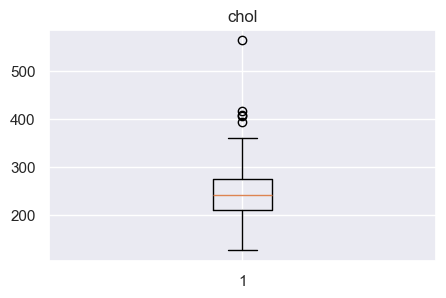

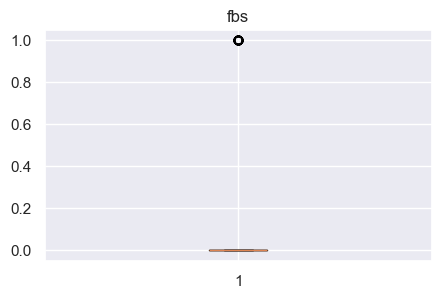

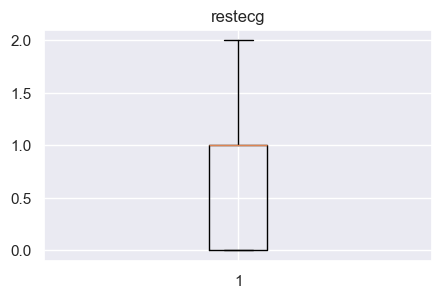

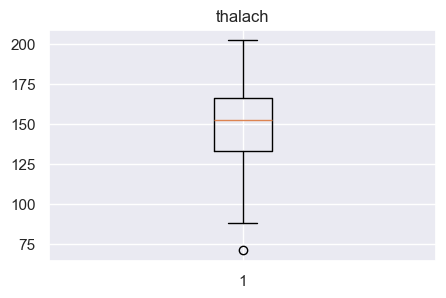

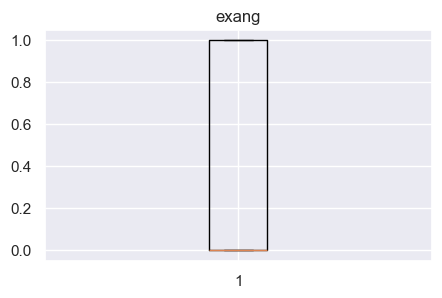

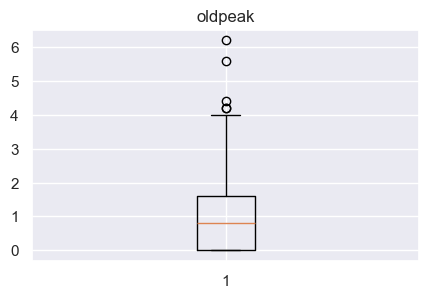

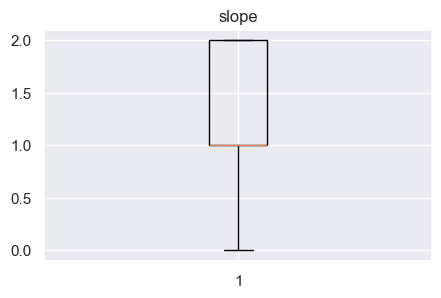

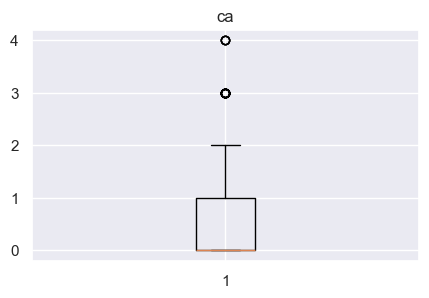

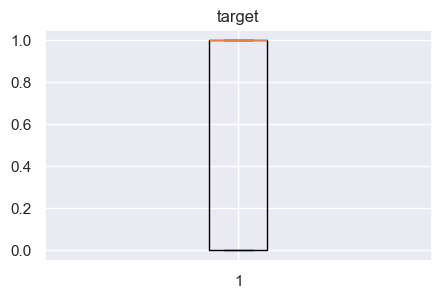

In [44]:
# Check for the outliers
for col in df_heart.columns:
    if df_heart[col].dtype != 'object':
        plt.figure(figsize=(5, 3))
        plt.boxplot(df_heart[col])
        plt.title(col)
        plt.show()

In [45]:
# Remove the outliers
outlier_column = ['trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

for col in outlier_column:
    Q1 = df_heart[col].quantile(0.25)
    Q3 = df_heart[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    df_heart = df_heart[(df_heart[col] >= lower_limit) & (df_heart[col] <= upper_limit)]

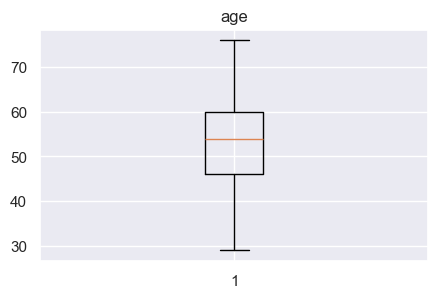

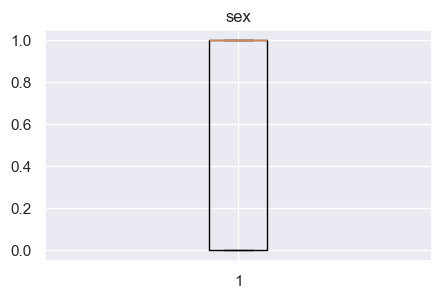

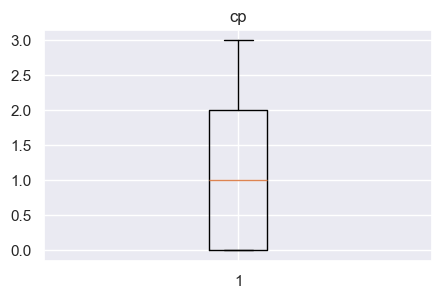

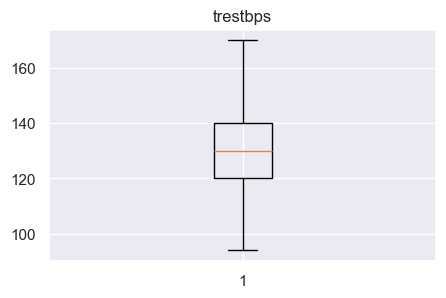

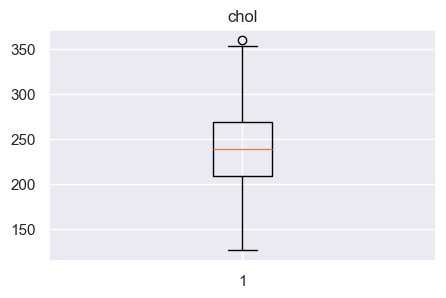

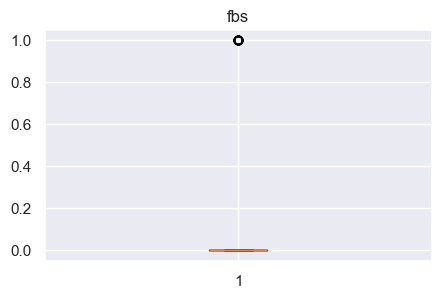

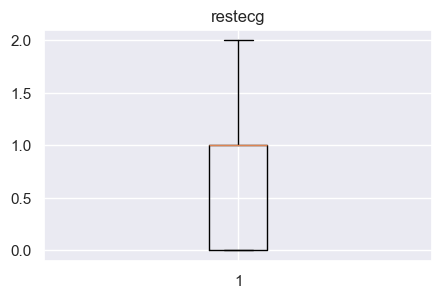

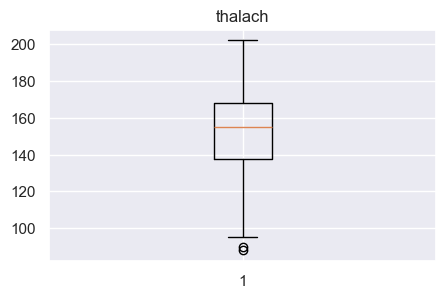

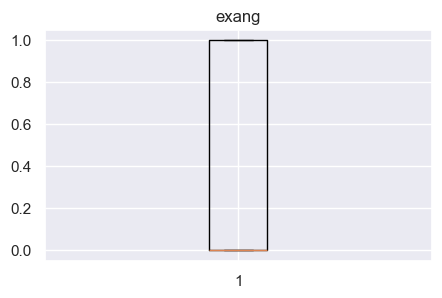

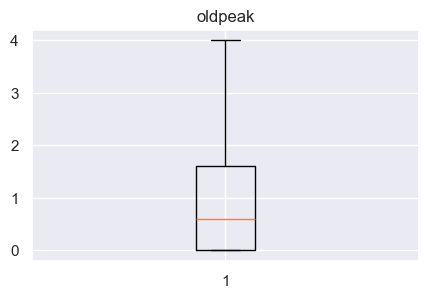

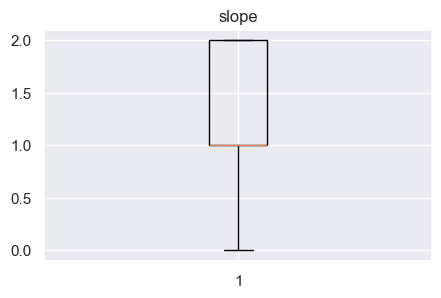

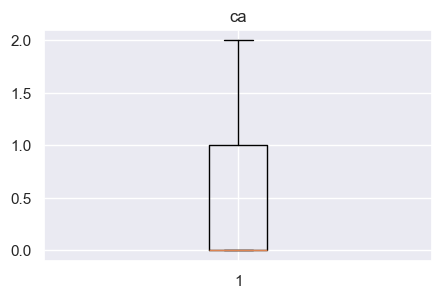

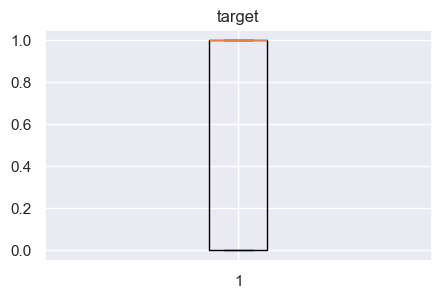

In [46]:
# Check whether the outliers removed or not
for col in df_heart.columns:
    if df_heart[col].dtype != 'object':
        plt.figure(figsize=(5, 3))
        plt.boxplot(df_heart[col])
        plt.title(col)
        plt.show()

-  When we are working with Linear Algorithms like Linear regression, Logistic regression, Linear SVM, it is <br/>
    important to remove the outlier from the outlier because they are highly affected by the outliers.

-  On the other hand, if we are working with tree-based algorithms, then we don't need to remove outliers since <br/>
    they are not affected by the outliers.

In [47]:
# Check the dtype of every column
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       263 non-null    int64  
 1   sex       263 non-null    int64  
 2   cp        263 non-null    int64  
 3   trestbps  263 non-null    int64  
 4   chol      263 non-null    int64  
 5   fbs       263 non-null    int64  
 6   restecg   263 non-null    int64  
 7   thalach   263 non-null    int64  
 8   exang     263 non-null    int64  
 9   oldpeak   263 non-null    float64
 10  slope     263 non-null    int64  
 11  ca        263 non-null    int64  
 12  target    263 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 28.8 KB


In [48]:
# Import the variance_inflation_factor class 
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF is a measure of amount of multicollinearity in regression model. <br/>

**vif < 5 :-** <br> low correlation between independent variables (Ideal) <br/>

**5 < vif > 10 :-** <br> moderate correalation between independent variables. <br/>

**vif > 10 :-** <br> high correlation between independent variables (not tolerable)<br/>
<br/>

Step :- Drop the column having high VIF among all columns and keep doing same procedure till VIF comes less tha 5.

In [49]:
c = []
for col in df_heart.columns:
    if col != 'target':
        c.append(col)

x = df_heart[c]
vif = pd.DataFrame()
vif['features'] = x.columns
vif['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif

,features,vif
0,age,42.165748
1,sex,3.400929
2,cp,2.449903
3,trestbps,70.123848
4,chol,31.013036
5,fbs,1.236651
6,restecg,2.126003
7,thalach,43.228088
8,exang,2.015054
9,oldpeak,3.072322


In [50]:
df_heart.drop(columns=['trestbps'], inplace=True)

In [51]:
c = []
for col in df_heart.columns:
    if col != 'target':
        c.append(col)

x = df_heart[c]
vif = pd.DataFrame()
vif['features'] = x.columns
vif['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif

,features,vif
0,age,28.354227
1,sex,3.370136
2,cp,2.439689
3,chol,29.855051
4,fbs,1.230361
5,restecg,2.123468
6,thalach,34.292671
7,exang,2.002458
8,oldpeak,2.951255
9,slope,10.132093


In [52]:
df_heart.drop(columns=['thalach'], inplace=True)

In [53]:
c = []
for col in df_heart.columns:
    if col != 'target':
        c.append(col)

x = df_heart[c]
vif = pd.DataFrame()
vif['features'] = x.columns
vif['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif

,features,vif
0,age,26.239131
1,sex,3.182032
2,cp,2.362527
3,chol,23.335772
4,fbs,1.227992
5,restecg,2.075812
6,exang,1.962454
7,oldpeak,2.916589
8,slope,8.431683
9,ca,1.869373


In [54]:
df_heart.drop(columns=['age'], inplace=True)

In [55]:
c = []
for col in df_heart.columns:
    if col != 'target':
        c.append(col)

x = df_heart[c]
vif = pd.DataFrame()
vif['features'] = x.columns
vif['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif

,features,vif
0,sex,3.149834
1,cp,2.307140
2,chol,11.579005
3,fbs,1.210657
4,restecg,2.044868
5,exang,1.954767
6,oldpeak,2.744430
7,slope,8.033126
8,ca,1.760102


In [56]:
df_heart.drop(columns=['chol'], inplace=True)

In [57]:
c = []
for col in df_heart.columns:
    if col != 'target':
        c.append(col)

x = df_heart[c]
vif = pd.DataFrame()
vif['features'] = x.columns
vif['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif

,features,vif
0,sex,3.086224
1,cp,2.158987
2,fbs,1.206115
3,restecg,2.023362
4,exang,1.843488
5,oldpeak,2.334007
6,slope,3.926995
7,ca,1.747361


In [58]:
df_heart

,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,target
0,1,3,1,0,0,2.3,0,0,1
1,1,2,0,1,0,3.5,0,0,1
2,0,1,0,0,0,1.4,2,0,1
3,1,1,0,1,0,0.8,2,0,1
4,0,0,0,1,1,0.6,2,0,1
...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,0.2,1,0,0
299,1,3,0,1,0,1.2,1,0,0
300,1,0,1,1,0,3.4,1,2,0
301,1,0,0,1,1,1.2,1,1,0


In [59]:
# Check whether the target variable is balanced or not 
df_heart['target'].value_counts()

target
1    152
0    111
Name: count, dtype: int64

In [60]:
# create data frame for independent variables & dependent variables
X = pd.DataFrame(df_heart.iloc[ : ,  : -1])
y = pd.DataFrame(df_heart.iloc[ : , -1])
X.head(1)

,sex,cp,fbs,restecg,exang,oldpeak,slope,ca
0,1,3,1,0,0,2.3,0,0


In [61]:
y.head(1)

,target
0,1


In [62]:
# Get the train & test data from train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [63]:
# Check whether the shape of both train & test data are equal or not
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(210, 8)
(53, 8)
(210, 1)
(53, 1)


In [64]:
# import standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [65]:
# Normalize the data using standard scaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

StandardScaler() is used to standardize the input data in a way that ensures that the data points have a balanced scale, <br/> 
which is crucial for machine learning algorithms, especially those that are sensitive to differences in feature scales. 

In [66]:
# import Logistic Regression class
from sklearn.linear_model import LogisticRegression

In [67]:
# Initialize the model
model = LogisticRegression()        

In [68]:
# Fitting the model / Training the model
model.fit(X_train, y_train)

LogisticRegression()

In [69]:
# Intercept
model.intercept_        # Beta 0

array([0.45431963])

In [70]:
# Coefficient
model.coef_             # Beta 1

array([[-1.09119743,  1.09383398,  0.16927456,  0.22092384, -0.44796168,
        -0.86306142,  0.39185385, -1.17205208]])

In [71]:
# Get the y_predicted from model & convert into df
y_predicted = model.predict(X_test)                                     # Got y_predicted in array type
y_predicted = pd.DataFrame(y_predicted, columns=['y_pred'])             # converting into df
y_predicted.head()

,y_pred
0,0
1,1
2,1
3,1
4,1


In [72]:
# Editing the dataframe of actual y (y_test)
y_test.rename(columns={'charges' : 'y_actual'}, inplace=True)       # renaming 'charges' to 'y_actual'
y_test.reset_index(inplace=True)                                    # reset index to start from 0
y_test.drop(columns='index', inplace=True)                          # dropping additional index column created by 'reset_index'
y_test.head()

,target
0,0
1,0
2,1
3,1
4,1


In [73]:
# concatenate y_actual & y_predicted to analyze(see) the difference (between both) manually
pd.concat([y_predicted, y_test], axis=1).head()

,y_pred,target
0,0,0
1,1,0
2,1,1
3,1,1
4,1,1


In [74]:
# import required metrics from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [75]:
# Accuracy score of model
acc = accuracy_score(y_test, y_predicted)
print("Accuracy :-", round(acc*100, 2))

Accuracy :- 75.47


In [76]:
# Precision score of model
precision_score(y_test,y_predicted)

0.7575757575757576

In [77]:
# Recall score / sensitivity of model
recall_score(y_test, y_predicted)

0.8333333333333334

In [78]:
# F1 score of model
f1_score(y_test, y_predicted) 

0.7936507936507936

In [79]:
cfm = confusion_matrix(y_test, y_predicted)
TN, FP, FN, TP = cfm.ravel()
print('True Negative  :-', TN)
print('False Postive  :-', FP)
print('False Negative :-', FN)
print('True Postive   :-', TP)

True Negative  :- 15
False Postive  :- 8
False Negative :- 5
True Postive   :- 25


END OF LOGISTIC REGRESSION

---

## Decision Tree

In [80]:
# import the requirred libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

In [81]:
# Import the required dataset
df_attrition = pd.read_csv(r'D:\Intellipaat\Datasets\Attrition.csv')
df_attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Exploratory Data Analysis

In [82]:
# Data infomation
df_attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [83]:
# Check for null values in DF
df_attrition.isna().sum().sum()

0

In [84]:
# Check for duplicate records in DF
df_attrition.duplicated().sum()

0

In [85]:
# Desciption of data
df_attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [86]:
# Remove some column which are not related to attrition (according to user)
df_attrition.drop(columns=['Over18', 'MaritalStatus', 'Gender', 'BusinessTravel'], inplace=True)

In [87]:
# dtypes of every column in df
df_attrition.dtypes

Age                          int64
Attrition                   object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [88]:
# Convert the object column to numerical
le = LabelEncoder()
for col in df_attrition.columns:
    if df_attrition[col].dtype == 'object' :
        df_attrition[col] = le.fit_transform(df_attrition[col])

In [89]:
# Check the changed dtypes of columns
df_attrition.dtypes

Age                         int64
Attrition                   int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

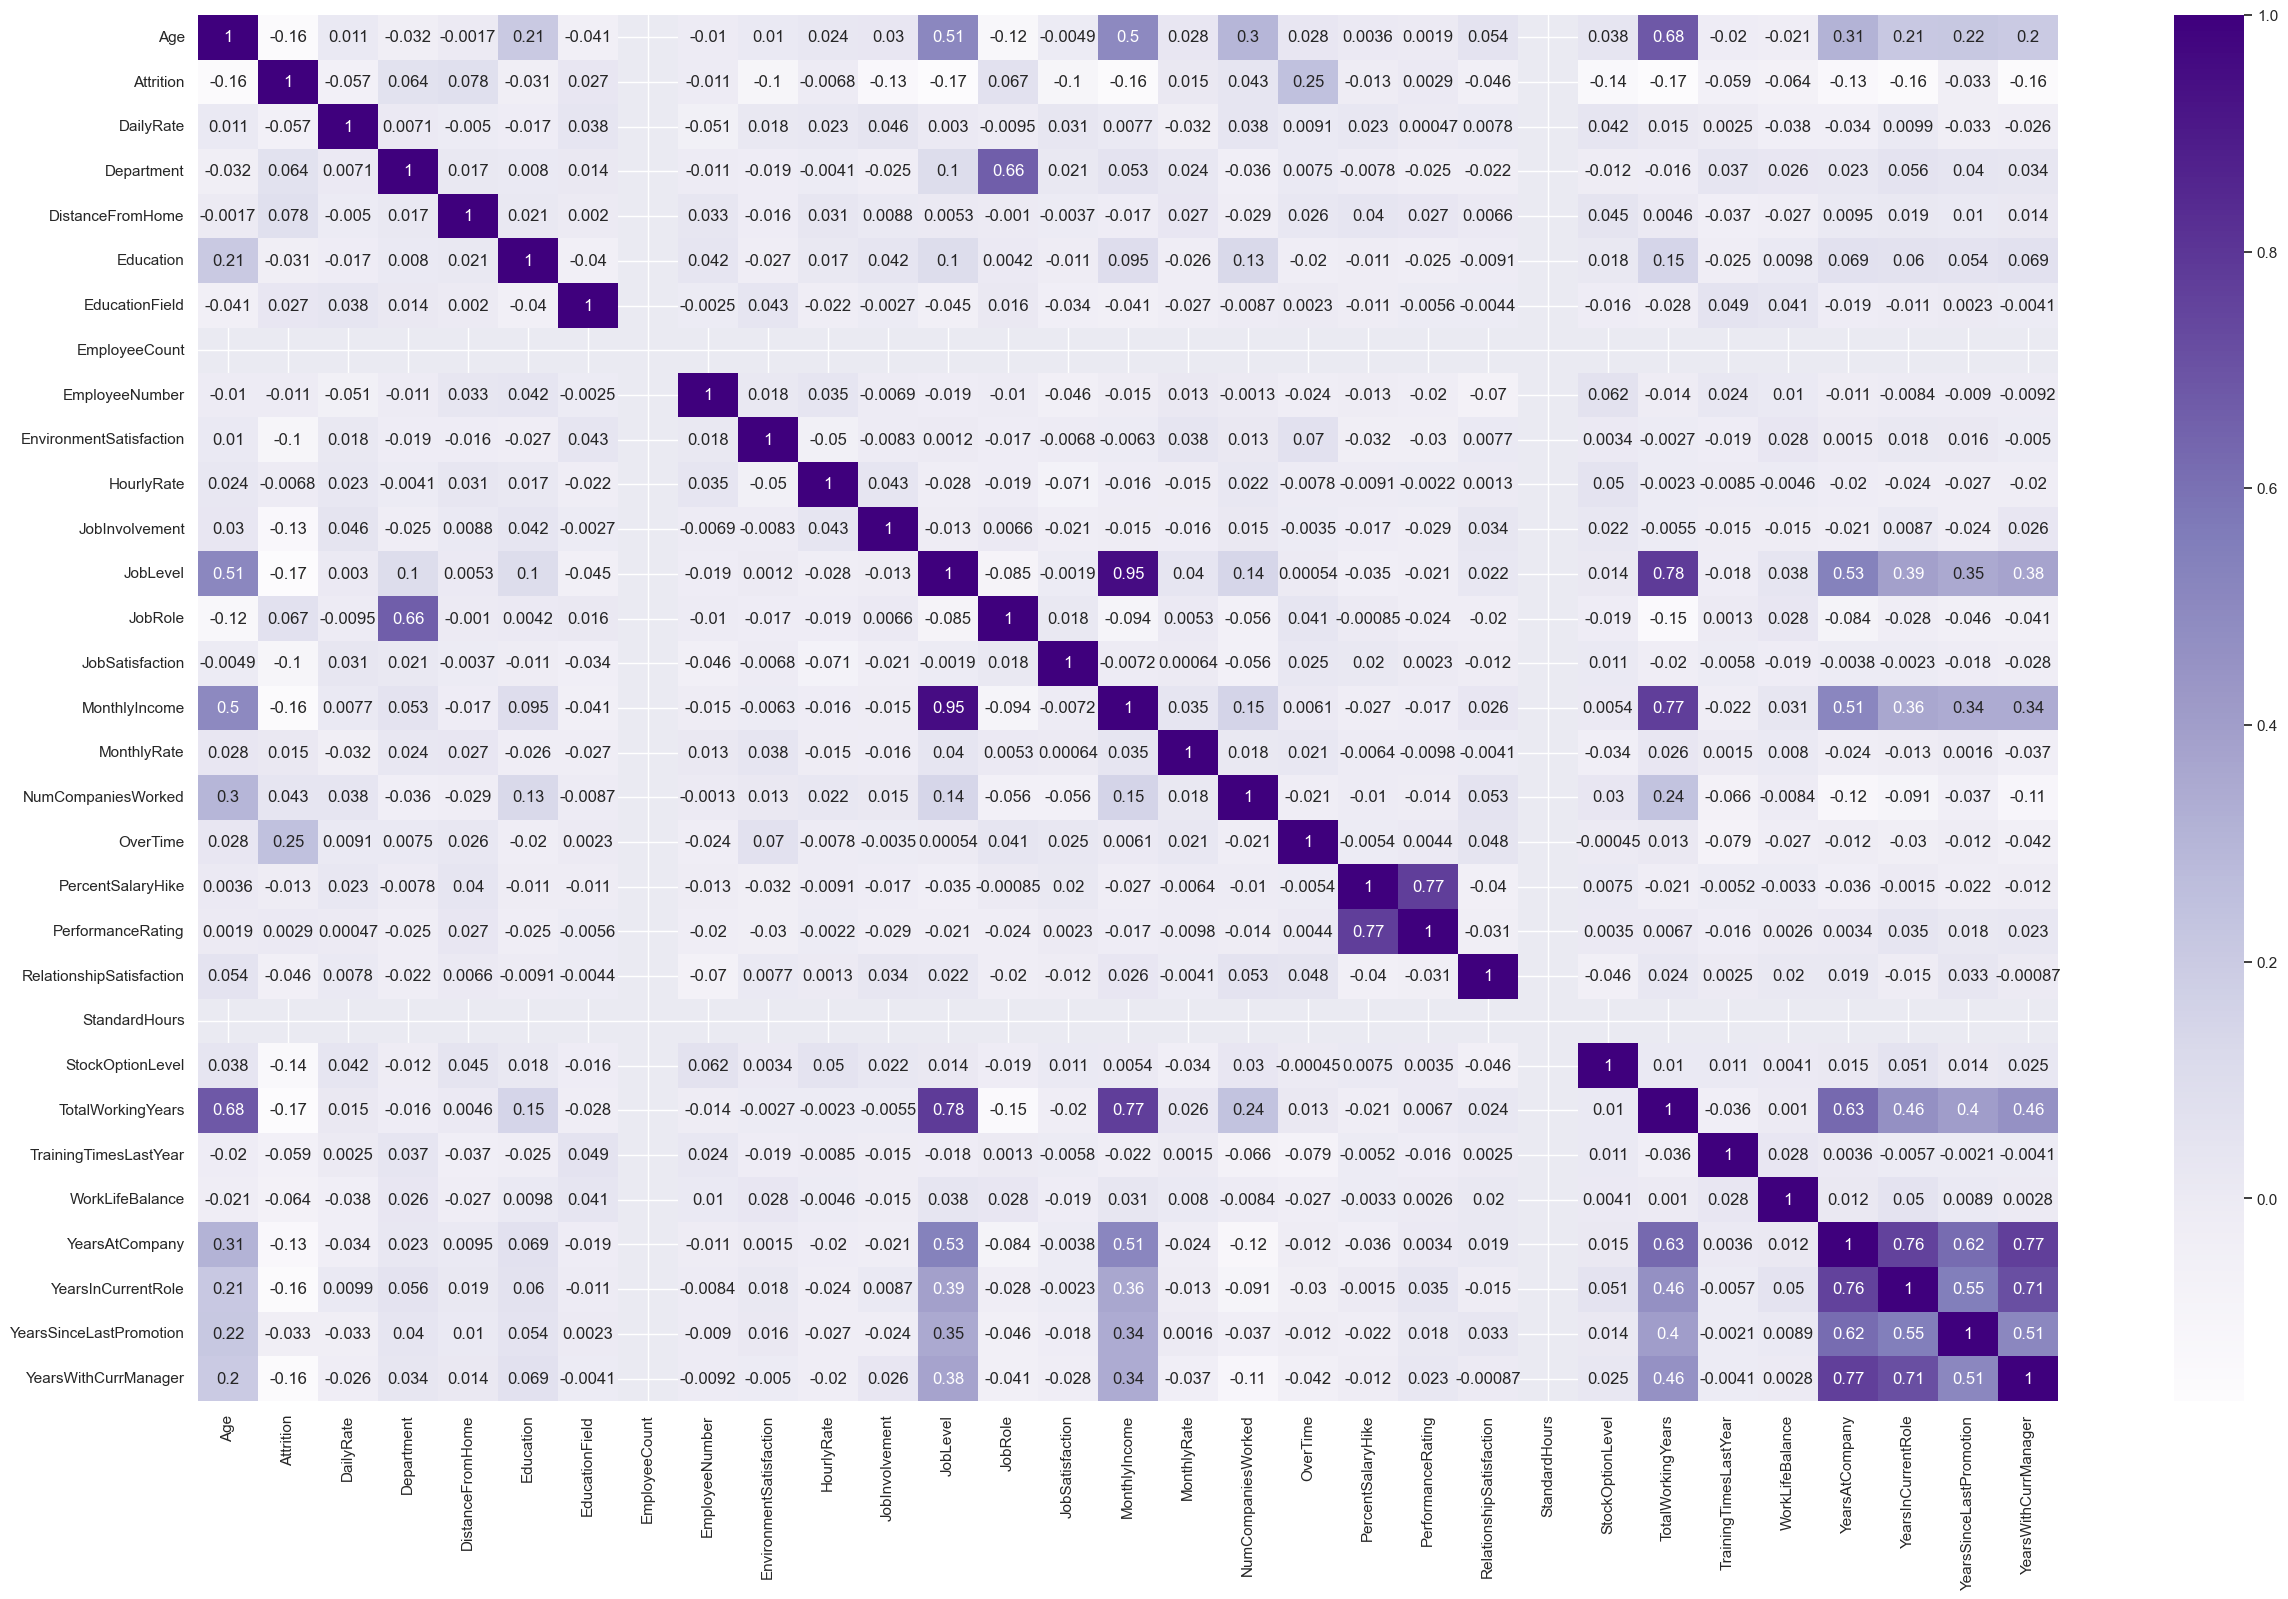

In [90]:
# Correlation matrix of cleaned dataset
plt.figure(figsize=(30, 18))
sns.heatmap(df_attrition.corr(), annot=True, cmap='Purples')
plt.show()

In [91]:
df_attrition

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,0,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,1,23,2,3,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,613,1,6,1,3,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,155,1,4,3,1,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1023,2,2,3,3,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [92]:
# create temporary variables
X = df_attrition.loc[ : , df_attrition.columns != 'Attrition']
y = df_attrition.loc[ : , "Attrition"]

In [93]:
# Feature selection
selector = SelectKBest(chi2, k=12)       # Test :- chi2, k :- 12
selector.fit_transform(X, y)

array([[  41, 1102,    1, ...,    6,    4,    5],
       [  49,  279,    8, ...,   10,    7,    7],
       [  37, 1373,    2, ...,    0,    0,    0],
       ...,
       [  27,  155,    4, ...,    6,    2,    3],
       [  49, 1023,    2, ...,    9,    6,    8],
       [  34,  628,    8, ...,    4,    3,    2]], dtype=int64)

SelectKBest is a straightforward feature selection method that selects the top K features/columns based on a statistical test, <br/>
such as chi-squared, ANOVA F test, or mutual information

In [94]:
# See the best columns got by SelectKBest function
final_features = X.columns[selector.get_support(indices=True)]
final_features

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber',
       'MonthlyIncome', 'MonthlyRate', 'OverTime', 'StockOptionLevel',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager'],
      dtype='object')

In [95]:
# Take the final_features of independent varaibles 
X = X[final_features]

In [96]:
# Check whether the data is imbalanced or not
y.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

Here we see that imbalance in the target exist, In such cases it is recommended to use stratified sampling as <br/>
implemented to ensure that relative class frequencies is approximately preserved in each train and validation fold.

In [97]:
# Get the training & testing data from train test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Here stratify ensures that the proportion of both training and testing data sets is the same as in original dataset. <br/>
stratify = y, because 'y' values are far below than 'x'. <br/>
This particularly useful when dealing with imbalanced datasets.

In [98]:
# Check the shape of varaibles
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1176, 12)
(294, 12)
(1176,)
(294,)


In [99]:
# Initialize dt_classifier model
model = DecisionTreeClassifier()

In [100]:
# Training / fitting the model
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [101]:
# Predict the y_pred from model
y_pred = model.predict(X_test)

In [102]:
# Check the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print('Accuracy :-',round(acc*100, 2))

Accuracy :- 77.89


Note :- 
- We should never use 'accuracy_score' as a metric to check the performance of classification model when there is imbalance in dataset, 
  rather we should use roc_auc_score in case of imbalance data.

In [103]:
# Check the roc auc score
roc = roc_auc_score(y_test, y_pred)
print("Roc Auc Score :-",round(roc*100, 2))

Roc Auc Score :- 63.58


In [104]:
# Check for the overfitting 
y_train_pred = model.predict(X_train)

In [105]:
accuracy_score(y_train, y_train_pred)

1.0

-  If the accuracy score of model for training data is 1.0(100%) then it is definitely case of overfitting. <br/>

   Note :- it can be 97, 96, 95 like that, but not 99.99, 100 this should neven happen. <br/>

-  If the difference between the accuracy score for training data & testing data is more than 15% then also it is
   case of overfitting

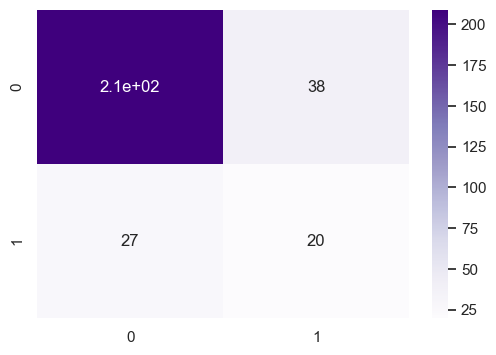

In [109]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Purples')
plt.show()

In [110]:
# Classification report of model's prediction
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       247
           1       0.34      0.43      0.38        47

    accuracy                           0.78       294
   macro avg       0.62      0.64      0.62       294
weighted avg       0.80      0.78      0.79       294



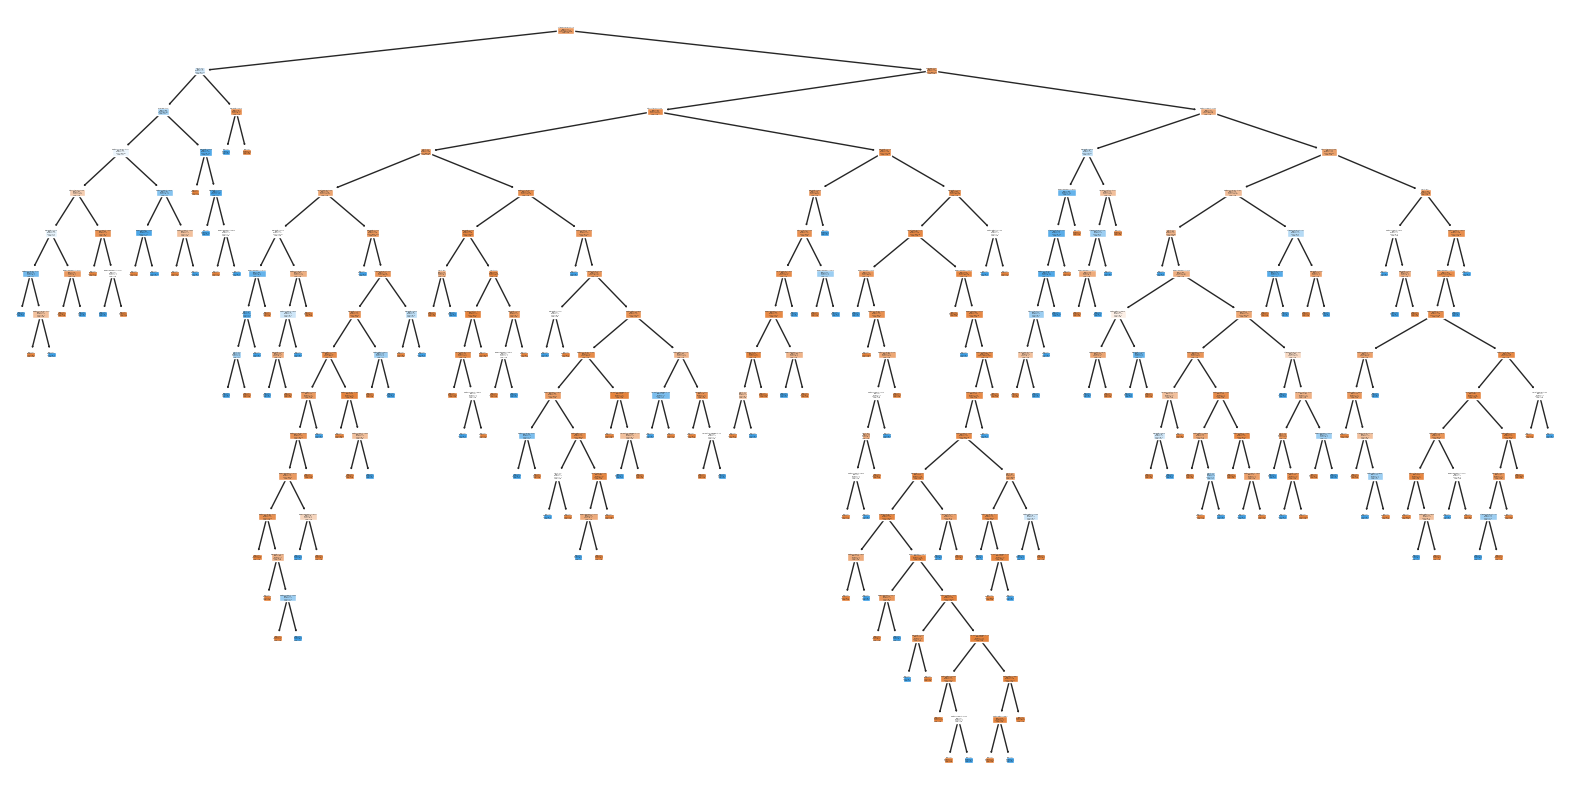

In [111]:
# Visualize the tree
plt.figure(figsize=(20, 10))
tree.plot_tree(model, feature_names=X.columns, filled=True, class_names=True)
plt.show()

In [115]:
# Depth of model
model.get_depth()

18

### Hyper-parameter tuning

In [116]:
# Setting up the parameters
params = {"criterion" : ['gini', 'entropy'], 
          "max_depth" : [12, 13, 14, 15, 16, 17], 
          "min_samples_split" : [10, 12, 14, 16]}

**criterion** :- The function to measure the quality of a split <br/>

**max depth** :- The maximum depth of the tree <br/>

**min_sample_split** :- The minimum number of samples required to split an internal node

In [117]:
# Create model
model2 = DecisionTreeClassifier(random_state=21)   

In [118]:
# Use hyper parameters
hyper = GridSearchCV(model2, params)

# Training the model
hyper.fit(X_train, y_train)     # Contain all possible combination of parameters passed in params

GridSearchCV(estimator=DecisionTreeClassifier(random_state=21),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [12, 13, 14, 15, 16, 17],
                         'min_samples_split': [10, 12, 14, 16]})

Grid search is an optimization technique used to brute force through all possible combinations of a set of variables.

In [119]:
# Display the best parameters from params
print("Best parameters :- ", hyper.best_params_)

Best parameters :-  {'criterion': 'gini', 'max_depth': 13, 'min_samples_split': 12}


In [120]:
# Create a hyper model using the best parameters
hypermodel = hyper.best_estimator_

In [121]:
# Predict the y_pred using hypermodel
pred = hypermodel.predict(X_test)

In [122]:
# Check the accuracy of hypermodel
acc = accuracy_score(y_test, pred)
print('Accuracy :- ',round(acc*100, 2))

Accuracy :-  81.63


In [123]:
# Check the roc auc score
roc = roc_auc_score(y_test, pred)
print("Roc Auc Score :-",round(roc*100, 2))

Roc Auc Score :- 64.95


Here we see accuracy score & roc auc score both increses by change in some parameters, <br/> 
and it can increse more by adding some other parameters, we will see it later

In [124]:
# Check whether the overfitting still exist or not
y_train_pred = hypermodel.predict(X_train)

In [125]:
accuracy_score(y_train, y_train_pred)

0.9345238095238095

Here as we see the accuracy of model for training data reduced and the difference between both accuracy(training & testing) is near by 10, <br/> 
so it means we optimized the performance of model and we can say it is pretty good model. <br/>
Let check the confusion matrics & also see the classification report.

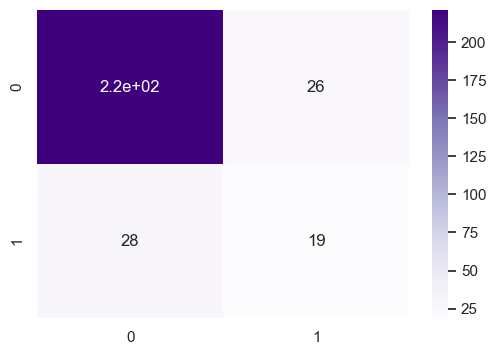

In [127]:
# Confusion matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Purples')
plt.show()

In [128]:
# Classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       247
           1       0.42      0.40      0.41        47

    accuracy                           0.82       294
   macro avg       0.65      0.65      0.65       294
weighted avg       0.81      0.82      0.81       294



END OF DECISION TREE

---

## Random Forest

In [129]:
# import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn import metrics

In [130]:
# import the dataset
df_churn = pd.read_csv(r'D:\Intellipaat\Datasets\Customer_churn.csv')
df_churn.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


### Exploratory Data Analysis

In [131]:
# Information of data
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Here, "TotalCharges" should be in numerical dtype but its not, convert its dtype

In [132]:
# Convert the dtype of TotalCharges column
df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')

In [133]:
# Remove the unnecessary columns
df_churn.drop(columns=['customerID'], inplace=True)

In [134]:
# Check for the null values
df_churn.isna().sum().sum()

11

In [135]:
# No. of rows & columns in df
print(f'Rows :- {df_churn.shape[0]}, Columns :- {df_churn.shape[1]}')

Rows :- 7043, Columns :- 20


In [136]:
# Remove the null values
df_churn.dropna(inplace=True)

In [137]:
# Check for the duplicates 
df_churn.duplicated().sum()

22

In [138]:
# Drop duplicates
df_churn.drop_duplicates(inplace=True)

In [139]:
# Check dtyper of columns
df_churn.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [140]:
# Encode the character features to numerical features
le = LabelEncoder()

for col in df_churn.columns:
    if df_churn[col].dtype == 'object':
        if len(df_churn[col].unique()) <=2 :
            df_churn[col] = le.fit_transform(df_churn[col])
        else :
            df_churn = pd.get_dummies(df_churn, columns=[col])
df_churn.astype(int)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29,29,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56,1889,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53,108,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42,1840,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70,151,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84,1990,0,...,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,103,7362,0,...,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,29,346,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74,306,1,...,1,0,0,1,0,0,0,0,0,1


In [141]:
# Convert boolean values to int values
df_churn.replace({'True' : 1, 'False' : 0}, inplace=True)

In [142]:
# Check dtypes of columns
df_churn.dtypes

gender                                       int32
SeniorCitizen                                int64
Partner                                      int32
Dependents                                   int32
tenure                                       int64
PhoneService                                 int32
PaperlessBilling                             int32
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int32
MultipleLines_No                              bool
MultipleLines_No phone service                bool
MultipleLines_Yes                             bool
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No                            bool
OnlineSecurity_No                             bool
OnlineSecurity_No internet service            bool
OnlineSecurity_Yes                            bool
OnlineBackup_No                

Now you see every columns is numerical and successfully encoded.

### Machine Learning Process

In [143]:
# Create indepemdent & dependent variables
X = df_churn.drop(columns=['Churn'])
y = df_churn['Churn']

In [144]:
# Split the variables in training & testing part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [145]:
# Create a model of RFC (random forest classifier)
model = RandomForestClassifier(random_state=21)

In [146]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=21)

In [147]:
# Get the prediction on X train & X test from model
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [148]:
# Check the accuracy of model for both Y test & Y train pred
acc_testing = accuracy_score(y_test, y_pred)
acc_training = accuracy_score(y_train, y_train_pred)
print("Accuracy of model before features selection\n")
print('Accuracy on Testing data :-', round(acc_testing, 2))
print('Accuracy on Training data :-', round(acc_training, 2))

Accuracy of model before features selection

Accuracy on Testing data :- 0.78
Accuracy on Training data :- 1.0


Here the model is overfitting

In [149]:
# Check the roc auc score due to imbalance in data
roc_auc_score(y_test, y_pred)

0.6879498354252669

In [150]:
# See the classification report ( TN, FP, FN, TP counts & recall, precision, etc)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1031
           1       0.60      0.49      0.54       371

    accuracy                           0.78      1402
   macro avg       0.72      0.69      0.70      1402
weighted avg       0.77      0.78      0.77      1402



The score of metrics like precision, recall, f1score is very low. Means the model's predictions are not quite good.

### Feature Selection using Random forest

In [151]:
# Extract the feature importance
importance = model.feature_importances_                                              # 0-1 values of features/columns according to their importance,
features = X.columns                                                                 # higher the value, higher the importance
df_impfeat = pd.DataFrame({'Features' : features, 'Importance' : importance})        # DF of feature name and their impotance

In [152]:
# Rank the features by importance
df_impfeat.sort_values(by='Importance', ascending=False, inplace=True)

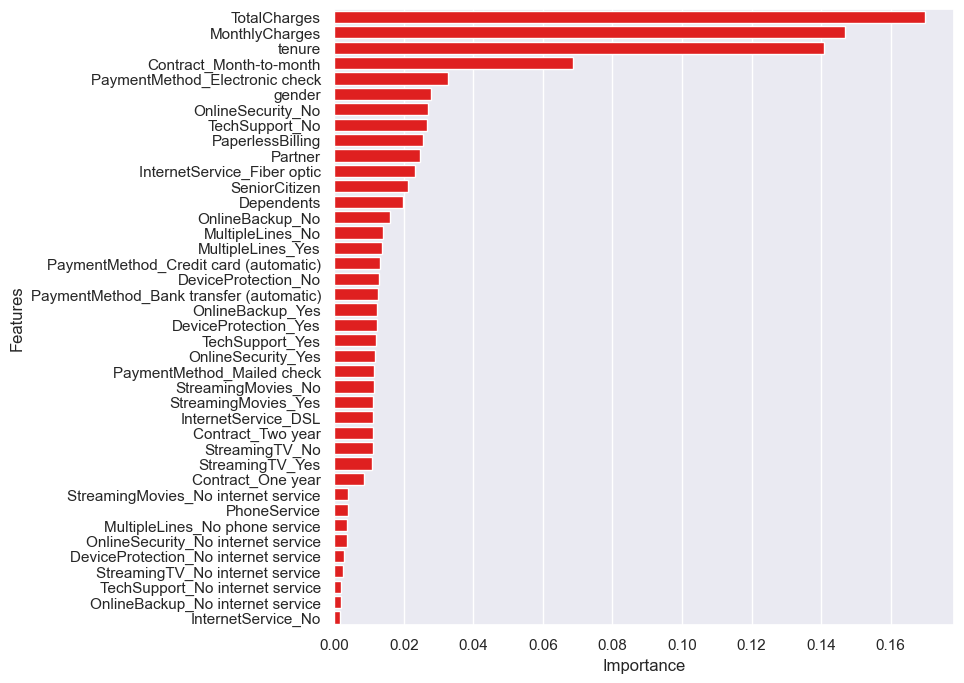

In [153]:
# Plot the importance of every column
plt.figure(figsize=(8, 8))
sns.barplot(data=df_impfeat, x='Importance', y='Features', orient='h', color='red')
plt.show()

In [154]:
# Select 20 best features & create training data 
top_features = df_impfeat['Features'][ : 10].values
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

In [155]:
# Create another model with selected features
model2 = RandomForestClassifier(random_state=21)

In [156]:
# Train the model
model2.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=21)

In [157]:
# Get the prediction on X train selected & X test selected from model2
y_pred2 = model2.predict(X_test_selected)
y_train_pred2 = model2.predict(X_train_selected)

In [158]:
# Check the accuracy with this model
acc_testing2 = accuracy_score(y_test, y_pred2)
acc_training2 = accuracy_score(y_train, y_train_pred2)
print("Accuracy of model after features selection\n")
print('Accuracy on Testing data :-', round(acc_testing2, 2))
print('Accuracy on Training data :-', round(acc_training2, 2))

Accuracy of model after features selection

Accuracy on Testing data :- 0.8
Accuracy on Training data :- 1.0


Here little bit of accuracy increased.

In [159]:
roc_auc_score(y_test, y_pred2)

0.7082164491073225

The roc auc score also increased by taking important features

In [160]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1031
           1       0.64      0.52      0.58       371

    accuracy                           0.80      1402
   macro avg       0.74      0.71      0.72      1402
weighted avg       0.79      0.80      0.79      1402



The metrics also inrceases, means the accuration of this model is better than previous one

Now boost the models prediction by applying hyper-parameters to it

### Hyper-Parameter Tuning in Random Forest

In [161]:
# Create the parameter for grid search
param_grid = {'n_estimators' : [25, 50, 75, 100], 
              'max_features' : ['sqrt', 'log2', None], 
              'max_depth' : [3, 6, 9], 
              'max_leaf_nodes' : [3, 6, 9]}

In [162]:
# Grid search to find best parameter for model
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid)
grid_search.fit(X_train_selected, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=9, max_leaf_nodes=9, n_estimators=25)


In [163]:
# Create new model with best parameter got by GridSearchCV
model_grid = RandomForestClassifier(n_estimators=75, max_depth=6, max_features=None, max_leaf_nodes=9, random_state=21)

In [164]:
# Train the model
model_grid.fit(X_train_selected, y_train)

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,
                       n_estimators=75, random_state=21)

In [165]:
# Get the predictions from the model
y_pred_grid = model_grid.predict(X_test_selected)
y_train_pred_grid = model_grid.predict(X_train_selected)

In [166]:
# Check the accuracy of model_grid
acc_grid_testing = accuracy_score(y_test, y_pred_grid)
acc_grid_training = accuracy_score(y_train, y_train_pred_grid)
print("Accuracy of hyper-parameter model\n")
print('Accuracy on Testing data :-', round(acc_grid_testing, 2))
print('Accuracy on Training data :-', round(acc_grid_training, 2))

Accuracy of hyper-parameter model

Accuracy on Testing data :- 0.83
Accuracy on Training data :- 0.8


Here, Accuracy increased by model build with best parameters

In [167]:
# Check the roc auc score of grid model
roc_auc_score(y_test, y_pred_grid)

0.7396934909974091

ROC AUC score also inrceases in good ammount

In [168]:
# Check the classification report
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      1031
           1       0.72      0.56      0.63       371

    accuracy                           0.83      1402
   macro avg       0.79      0.74      0.76      1402
weighted avg       0.82      0.83      0.82      1402



By comparing all 3 classification report, we can clearly see this is best among all 3 models.

END OF RANDOM FOREST

---

## Naive Bayes

In [169]:
# import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [171]:
# import the required dataset
df_emails = pd.read_csv(r'D:\Intellipaat\Datasets\Emails.csv')
df_emails

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


### Exploratory Data Analysis

In [172]:
# Data info
df_emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [173]:
# No. of rows & columns in df
print(f"Rows :- {df_emails.shape[0]}\nColumns :- {df_emails.shape[1]}")

Rows :- 5728
Columns :- 2


In [174]:
# Print the spam messages
df_emails[df_emails['spam'] == 1]

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [175]:
# Print the non-spam emails
df_emails[df_emails['spam'] == 0]

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [176]:
# Check for the duplicates
df_emails.duplicated().sum()

33

In [177]:
# Print tht duplicate rows
df_emails[df_emails.duplicated()].head(10)

,text,spam
2155,Subject: research allocations to egm hi becky...,0
2260,Subject: departure of grant masson the resear...,0
2412,"Subject: re : schedule and more . . jinbaek ,...",0
2473,"Subject: day off tuesday stinson , i would l...",0
2763,"Subject: re : your mail zhendong , dr . kami...",0
3123,"Subject: re : grades pam , the students rese...",0
3152,Subject: tiger evals - attachment tiger hosts...,0
3248,"Subject: re : i am zhendong zhendong , thank...",0
3249,Subject: hello from enron dear dr . mcmullen ...,0
3387,"Subject: term paper dr . kaminski , attached...",0


In [178]:
# drop the duplicates from df
df_emails.drop_duplicates(inplace=True)

In [179]:
spam_msgs = df_emails[df_emails['spam'] == 1]
non_spam_msgs = df_emails[df_emails['spam'] == 0]

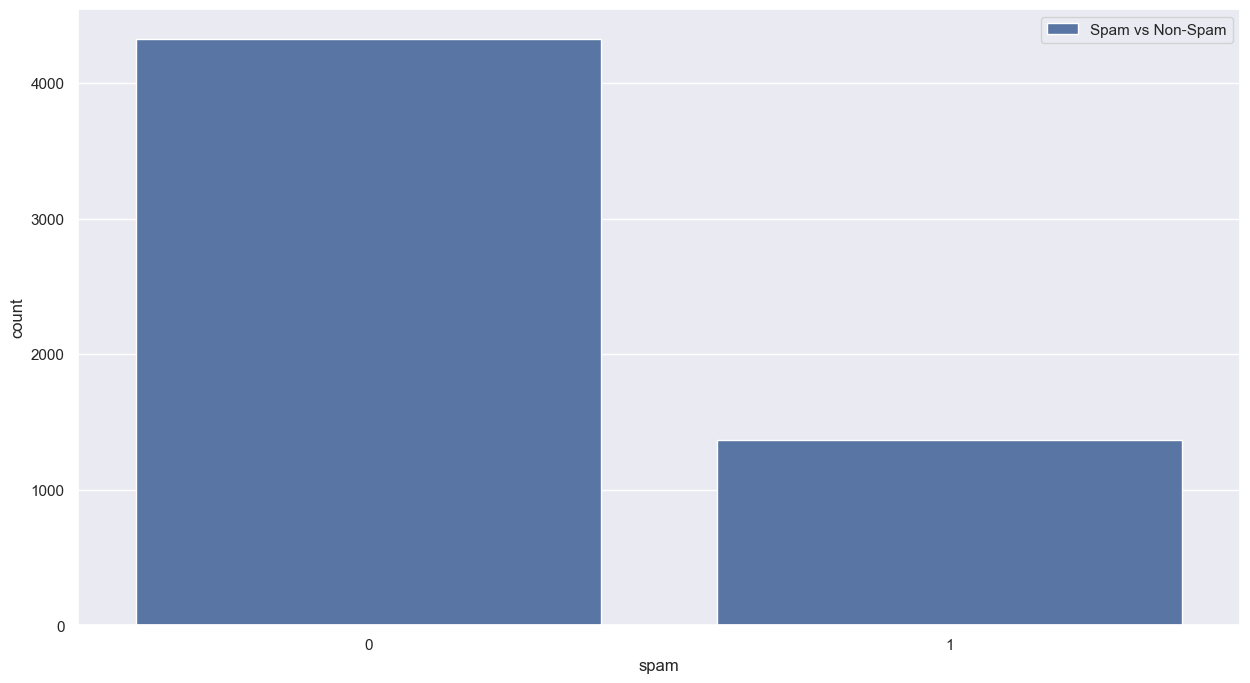

In [180]:
# See the distribution of spam & non-spam messages
sns.countplot(data=df_emails, x='spam', label = "Spam vs Non-Spam")
plt.show()

In [181]:
# Apply count vectorizer to email dataset
vectorizer = CountVectorizer()              # Instance of CountVectorizer
vectorized_input_data = vectorizer.fit_transform(df_emails['text'])

In [182]:
# See the words seperated by vectorizer
vectorizer.get_feature_names_out()[7000 : 7500]

array(['boss', 'bosse', 'bosses', 'boston', 'botanist', 'botany',
       'botchlett', 'botello', 'both', 'bothe', 'bother', 'bothered',
       'bothering', 'bothers', 'bothwell', 'botox', 'botoxforless',
       'botswana', 'bottle', 'bottled', 'bottleneck', 'bottlenecks',
       'bottles', 'bottom', 'bottomfeeding', 'bottomley', 'bottomof',
       'bou', 'bouchaud', 'bouchouev', 'boudreau', 'boudreaux', 'bought',
       'bouillion', 'boulder', 'boulton', 'boumdary', 'bounce', 'bounced',
       'bouncehost', 'bouncing', 'bound', 'boundaries', 'boundary',
       'bounday', 'bounded', 'bounds', 'bouquet', 'bourahla', 'bourke',
       'bourque', 'bourse', 'bow', 'bowed', 'bowen', 'bower', 'bowers',
       'bowes', 'bowguns', 'bowie', 'bowl', 'bowlegged', 'bowling',
       'bowne', 'bows', 'box', 'boxcar', 'boxed', 'boxes', 'boxing',
       'boy', 'boyd', 'boyer', 'boyffriend', 'boyfriend', 'boyish',
       'boyle', 'boys', 'boyt', 'bp', 'bpa', 'bpc', 'bpd', 'bpf', 'bpl',
       'bpserver',

### Machine Learning Process

In [183]:
# Create independent, dependent variables
X = vectorized_input_data
y = df_emails['spam']

In [184]:
# Split the data into training & testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [185]:
# Apply multinoial Naive Bayes to the data
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [186]:
# Predict the output with nb classifier
y_pred = nb_classifier.predict(X_test)

In [187]:
# Check the accuracy score of model
accuracy_score(y_test, y_pred)

0.9868305531167691

In [188]:
# Check the roc auc score of model
roc_auc_score(y_test, y_pred)

0.9864723058673237

In [189]:
# Test the model on unseen messages
msgs = ['Congratulation, you have a pre-approved loan of 50000 US dollars. No documentation required.',
        'Can we have a meeting tomorrow at 5 PM?',
        'Get annual cashback of upto 18000 with HDFC smart credit card.']

In [190]:
# transform the messages into vetors
msgs_vectorized = vectorizer.transform(msgs)

In [191]:
# Predict the unseen messages
nb_classifier.predict(msgs_vectorized)

array([1, 0, 1], dtype=int64)

Here the model predicts 1, 3 as Spam & 2 as non-spam which is correct.
so this means the accuracy is quite good of the model

END OF NAIVE BAYES

---

## K-Means Clustering

In [192]:
# import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [193]:
# Import the dataset
df_mallcust = pd.read_csv(r'D:\Intellipaat\Datasets\Mall_customers.csv')
df_mallcust.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Exploratory Data Analysis

In [194]:
# Data information
df_mallcust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [195]:
# Check for the null values in df
df_mallcust.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [196]:
# Check for the duplicates in df
df_mallcust.duplicated().sum()

0

In [197]:
# Drop the 'CustomerID' column from df
df_mallcust.drop(columns=['CustomerID'], inplace=True)

In [198]:
# Encode the 'Gender' column in numeric
df_mallcust.replace({'Female' : 0, 'Male' : 1}, inplace=True)

### Machine Learning Process

In [199]:
X = df_mallcust

In [200]:
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [201]:
# Code to not pop up future warning
import warnings
warnings.filterwarnings('ignore')

In [202]:
wcss = []

for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)                                       # take the data and start making clusters according to the above mentioned k-values
    wcss.append(kmeans.inertia_)

WCSS means within cluster sum of square distances. It helps to choose the k-value/identify the number of clusters.

In [203]:
wcss

[308862.06000000006,
 212889.44245524294,
 190097.8665107853,
 104414.67534220168,
 75542.77371510217,
 58350.65449462818,
 54947.075680447,
 44389.807673557676,
 43640.601104309346,
 38079.762792170644,
 41822.053305492234,
 34217.763128815626,
 33107.99003866504,
 28121.687319401448,
 26074.861888318082]

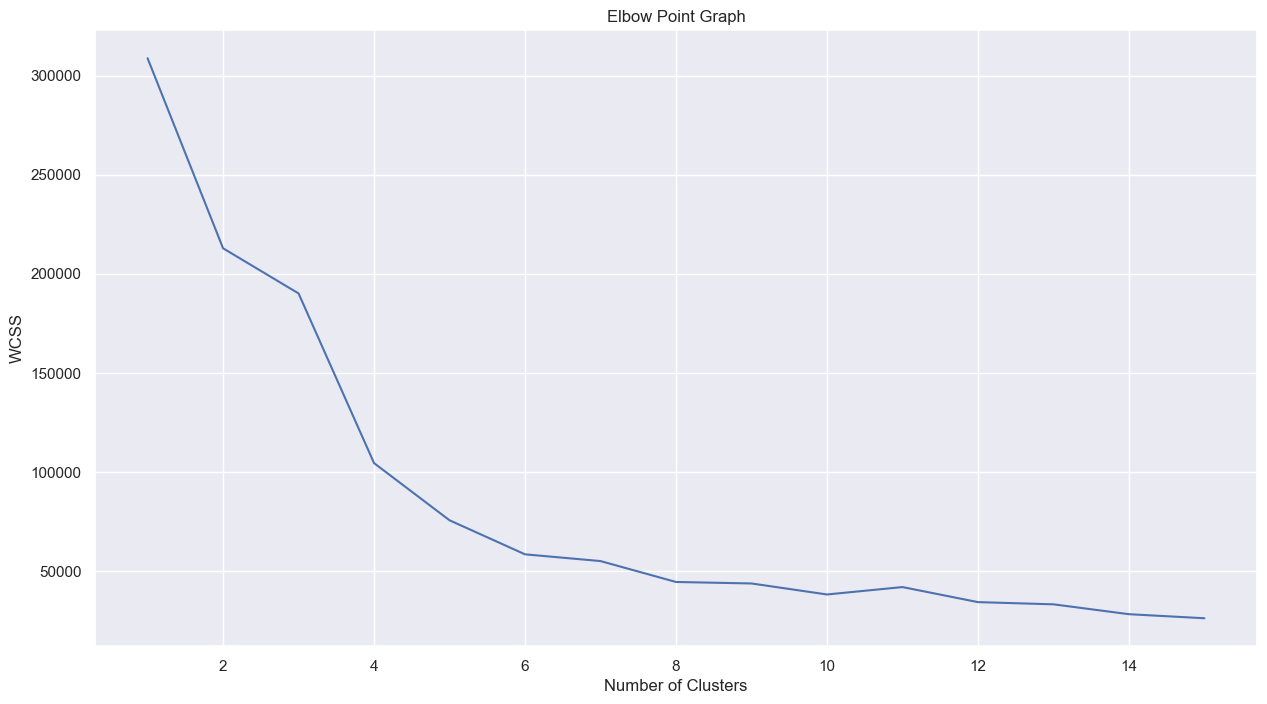

In [204]:
# Plot k-value vs wcss
plt.plot(range(1, 16), wcss)
plt.title("Elbow Point Graph")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The optimal number of cluster on the given data is 7

In [205]:
# Apply K-Means for one final time with k-value
kmeans = KMeans(n_clusters = 7, init = 'k-means++')

kmeans.fit(X)                                       # Creation of the clusters
Y = kmeans.predict(X)                               # Predict the cluster number for each data point
Y = pd.DataFrame(Y, columns=['Cluster_number'])     # Convert the Y to dataframe
Y

,Cluster_number
0,3
1,4
2,3
3,4
4,3
...,...
195,0
196,1
197,0
198,1


Here, the Y df stores the cluster number of each data point

In [206]:
final_df = pd.concat([X, Y], axis=1)
final_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_number
0,1,19,15,39,3
1,1,21,15,81,4
2,0,20,16,6,3
3,0,23,16,77,4
4,0,31,17,40,3
...,...,...,...,...,...
195,0,35,120,79,0
196,0,45,126,28,1
197,1,32,126,74,0
198,1,32,137,18,1


Here, We started with the data which did not have the output column and then by doing some process of unsupervised learning <br/> 
we have created the output column, so now we can treat this as classification problem because now we have input & output variables. <br/>

- Further we can do is to create a model by applying supervised learning algorithm like (logistic Regression, decision tree, random forest, ...)

- In future, with the help of model we can predict that the new customer is falling in which cluster

and this will done by classification algorithm, because k-means doesn't know the concept of training & testing,<br/> 
and output column so its not for predicting things.

END OF K-MEANS CLUSTERING

---

## Hierarchical Clustering

In [207]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Code to not pop up future warning
import warnings
warnings.filterwarnings('ignore')

In [208]:
# Import the dataset
df_mallcust = pd.read_csv(r'D:\Intellipaat\Datasets\Mall_customers.csv')
df_mallcust.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Exploratory Data Analysis

In [209]:
# Data info
df_mallcust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [210]:
# Check for the null values in df
df_mallcust.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [211]:
# Check for duplicates in df
df_mallcust.duplicated().sum()

0

In [212]:
# Drop the CustomerID column from df
df_mallcust.drop(columns=['CustomerID'], inplace=True)
df_mallcust

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [213]:
# Encode the 'Gender' column in numeric
df_mallcust.replace({'Female' : 0, 'Male' : 1}, inplace=True)
df_mallcust.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


### Machine Learning Process

In [214]:
# Create a deep copy of df for input variable
X = df_mallcust.copy(deep=True)
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


**Shallow copy** :- <br/>
Means both variable refers to same data (memory location), change in one variable automatically changes other variable.

**Deep copy** :- <br/>
Means both variable refers to seperate data (memory location), change in one variable doesn't changes other variable.

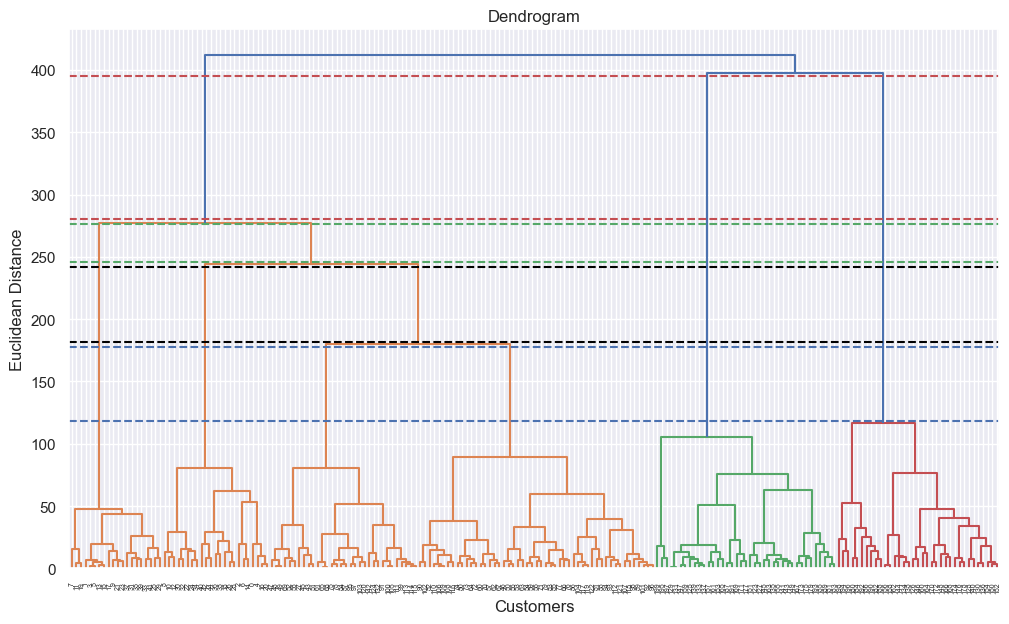

In [215]:
# Plot a dendrogram to find the no. of clusters.
plt.figure(figsize=(12, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))       # Here 'ward' = ward linkage
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.axhline(y=395, color = 'r', linestyle = '--')
plt.axhline(y=280, color = 'r', linestyle = '--')
plt.axhline(y=276, color = 'g', linestyle = '--')
plt.axhline(y=246, color = 'g', linestyle = '--')
plt.axhline(y=242, color = 'black', linestyle = '--')
plt.axhline(y=182, color = 'black', linestyle = '--')
plt.axhline(y=178, color = 'b', linestyle = '--')
plt.axhline(y=118, color = 'b', linestyle = '--')
plt.show()

- linkage specifies how the distance between two clusters is calculated
- Here, linkage method is choosen as ward. (Also there are complete, average, single. But most of the times ward gives best results)

Here the distance between connecting point 1 & 2 (between red) is maximum so we will take it as threshold <br/>
And there are 3 vertical line intersecting between the distance, so the number of clusters is 3 (K = 3).

In [217]:
# Apply Agglomerative clustering on the data
agg_cluster = AgglomerativeClustering(n_clusters=3, metric = 'euclidean', linkage = 'ward')

Here 'euclidean' is the formula used to calculate the distance between two data points

In [218]:
# Fit & predict using model
Y = agg_cluster.fit_predict(X)
Y = pd.DataFrame(Y, columns=['Cluster_number'])
Y.head()

,Cluster_number
0,0
1,0
2,0
3,0
4,0


In [219]:
# Create final df having both X & y
final_df = pd.concat([df_mallcust, Y], axis=1)
final_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_number
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,0
3,0,23,16,77,0
4,0,31,17,40,0
...,...,...,...,...,...
195,0,35,120,79,2
196,0,45,126,28,1
197,1,32,126,74,2
198,1,32,137,18,1


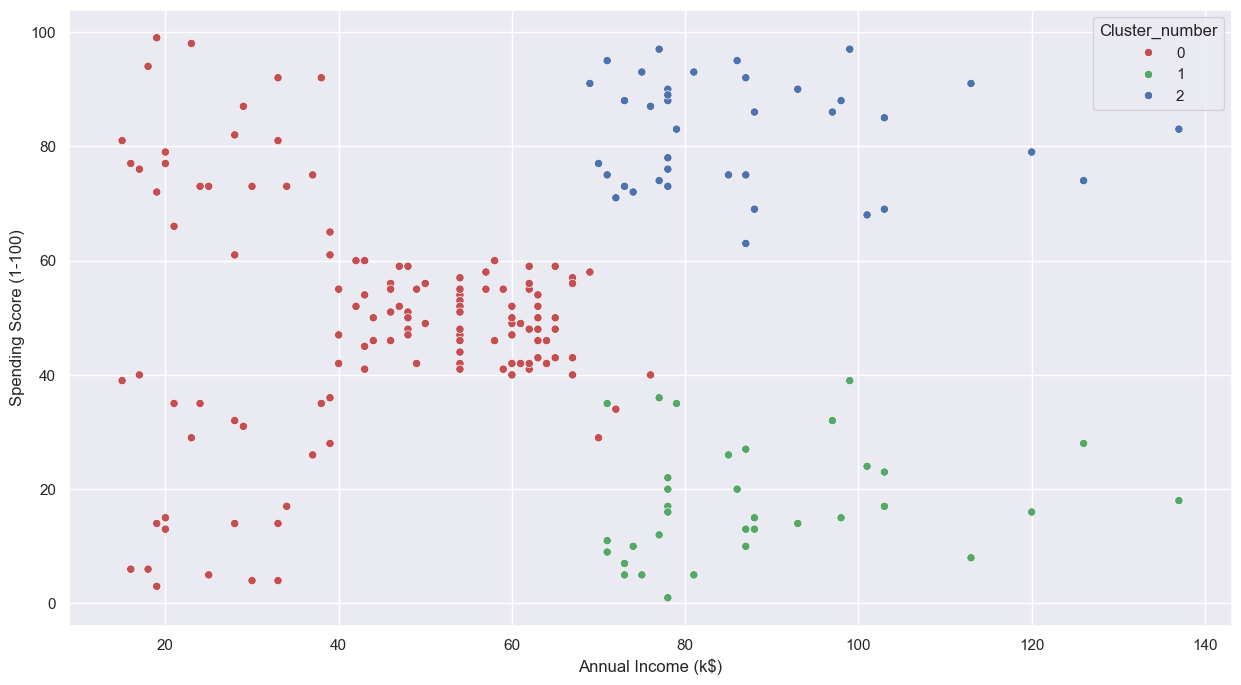

In [220]:
# Plot the scatterplot to view the clusters based on income & spending (only 2 dimension data can be used for scatter plot)
sns.scatterplot(data=final_df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_number', palette=['r', 'g', 'b'])
plt.show()

END OF HIERARCHICAL CLUSTERING

---

## Association Rule

In [221]:
# import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# code for not pop-up future warning
import warnings
warnings.filterwarnings('ignore')

In [222]:
# Import the required dataset
df_supermarket = pd.read_csv(r'D:\Intellipaat\Datasets\supermarket_binarymat.csv')
df_supermarket.head()

,transID,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,...,UHT-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Exploratory Data Analysis

In [223]:
# shape of data
df_supermarket.shape

(9835, 170)

In [224]:
# dtypes of columns in df
df_supermarket.dtypes

transID             int64
abrasive cleaner    int64
artif. sweetener    int64
baby cosmetics      int64
baby food           int64
                    ...  
white bread         int64
white wine          int64
whole milk          int64
yogurt              int64
zwieback            int64
Length: 170, dtype: object

In [225]:
# Remove the 'transID' from df
df_supermarket.drop(columns=['transID'], inplace=True)
df_supermarket.head()

,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,...,UHT-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [226]:
# Display top 20 most frequently purchased products
df_supermarket.sum().sort_values(ascending=False)[ : 20]

whole milk               2513
other vegetables         1903
rolls/buns               1809
soda                     1715
yogurt                   1372
bottled water            1087
root vegetables          1072
tropical fruit           1032
shopping bags             969
sausage                   924
pastry                    875
citrus fruit              814
bottled beer              792
newspapers                785
canned beer               764
pip fruit                 744
fruit/vegetable juice     711
whipped/sour cream        705
brown bread               638
domestic eggs             624
dtype: int64

In [227]:
# Create a deep copy of df to prevent from changing
df = df_supermarket.copy(deep=True)
df.head()

,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,berries,beverages,...,UHT-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [228]:
# Replace 0 & 1 to boolean values i.e. False & True
df = df.astype(bool)

This is used to make model faster because they are not text values, bool values are like switches which on/off means <br/>
they just tell that value is present or not, that's it.

Also note that this is only done when whole dataframe is in binary i.e., (0 & 1). No other values, otherwise it won't work.

### Building Association Rules

You will need to call two functions to perform this process:
- The first function is `frequent_itemset`.
- The second function is `association_rules`.

In [229]:
# support of 0.01 means that product should be in atleast 1% baskets
frequent_items = apriori(df, min_support = 0.01, use_colnames = True)
frequent_items

,support,itemsets
0,0.017692,(baking powder)
1,0.052466,(beef)
2,0.033249,(berries)
3,0.026029,(beverages)
4,0.080529,(bottled beer)
...,...,...
328,0.011998,"(whole milk, tropical fruit, root vegetables)"
329,0.014540,"(yogurt, whole milk, root vegetables)"
330,0.010473,"(whole milk, soda, yogurt)"
331,0.015150,"(yogurt, whole milk, tropical fruit)"


`Apriori` is a popular algorithm for extracting frequent itemsets with applications in association rule learning. 

Support tells the popularity of an item, means how frequently the item appears within a dataset

- We choose items which are frequently bought by customers,<br/>
 because there is no point on wasting time on products which aren't frequently bought.

In [231]:
# Apply association rules on frequent items
association_rules(frequent_items, metric='lift')        # default metric is always 'confidence' and its threshold is 0.8

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(other vegetables),(beef),0.193493,0.052466,0.019725,0.101944,1.943066,0.009574,1.055095,0.601792
1,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416,0.512224
2,(rolls/buns),(beef),0.183935,0.052466,0.013625,0.074074,1.411858,0.003975,1.023337,0.357463
3,(beef),(rolls/buns),0.052466,0.183935,0.013625,0.259690,1.411858,0.003975,1.102329,0.307866
4,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628,0.708251
...,...,...,...,...,...,...,...,...,...,...
611,"(whipped/sour cream, yogurt)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719,0.523711
612,"(whole milk, yogurt)",(whipped/sour cream),0.056024,0.071683,0.010880,0.194192,2.709053,0.006864,1.152033,0.668309
613,(whipped/sour cream),"(whole milk, yogurt)",0.071683,0.056024,0.010880,0.151773,2.709053,0.006864,1.112881,0.679582
614,(whole milk),"(whipped/sour cream, yogurt)",0.255516,0.020742,0.010880,0.042579,2.052747,0.005580,1.022807,0.688864


We use 'lift' metric becasue it is better than 'confidence'

- Confidence fails to finds if there is actual associativity or the associativity is by chance (no correlation).\
- Lift is better because it do tells the strength of associativity, so we choose 'lift' always

Information <br/>
- Here 'antecedents' are those items which are purchased first and 'consequents' are those items which purchased after the antecedants. <br/>

- 'antecedant support' is the support values (popularity) of antecedant <br/> 

- 'consequent support' is the support values (popularity) of consequent <br/>

- support is overall popularity of both antecedant & consequent <br/>

- 'lift' is a metric used to evaluate the strength of an association between two items <br/>
    if lift = 1 (or nearby), means no correlation between antecedant & consequent <br/>
    if lift > 1, means there eis possitive correlation between antecedant & consequent <br/>
    if lift < 1, means there is negative correlation between antecedant & consequent


In [232]:
# Display the frequent items by applying minimum threshold
rules = association_rules(frequent_items, metric = 'lift', min_threshold = 1.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(other vegetables),(beef),0.193493,0.052466,0.019725,0.101944,1.943066,0.009574,1.055095,0.601792
1,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416,0.512224
2,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628,0.708251
3,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366,0.753189
4,(whole milk),(beef),0.255516,0.052466,0.021251,0.083168,1.585180,0.007845,1.033487,0.495856
...,...,...,...,...,...,...,...,...,...,...
377,"(whipped/sour cream, yogurt)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719,0.523711
378,"(whole milk, yogurt)",(whipped/sour cream),0.056024,0.071683,0.010880,0.194192,2.709053,0.006864,1.152033,0.668309
379,(whipped/sour cream),"(whole milk, yogurt)",0.071683,0.056024,0.010880,0.151773,2.709053,0.006864,1.112881,0.679582
380,(whole milk),"(whipped/sour cream, yogurt)",0.255516,0.020742,0.010880,0.042579,2.052747,0.005580,1.022807,0.688864


In [233]:
# Sort the items by lift value in descending order
rules.sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
244,(curd),"(whole milk, yogurt)",0.053279,0.056024,0.010066,0.188931,3.372304,0.007081,1.163866,0.743056
241,"(whole milk, yogurt)",(curd),0.056024,0.053279,0.010066,0.179673,3.372304,0.007081,1.154078,0.745217
227,(root vegetables),"(other vegetables, citrus fruit)",0.108998,0.028876,0.010371,0.095149,3.295045,0.007224,1.073242,0.781720
222,"(other vegetables, citrus fruit)",(root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045,0.007224,1.390354,0.717225
331,"(other vegetables, yogurt)",(whipped/sour cream),0.043416,0.071683,0.010168,0.234192,3.267062,0.007056,1.212206,0.725409
...,...,...,...,...,...,...,...,...,...,...
181,(pork),(whole milk),0.057651,0.255516,0.022166,0.384480,1.504719,0.007435,1.209520,0.355945
113,(fruit/vegetable juice),(other vegetables),0.072293,0.193493,0.021047,0.291139,1.504653,0.007059,1.137751,0.361531
112,(other vegetables),(fruit/vegetable juice),0.193493,0.072293,0.021047,0.108776,1.504653,0.007059,1.040936,0.415861
18,(soda),(bottled water),0.174377,0.110524,0.028978,0.166181,1.503577,0.009705,1.066750,0.405656


In [234]:
# Display the frequent items where lift value & confidence values are greater than 1.5
rules[(rules['lift'] >= 1.5) & (rules['confidence'] >= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
217,"(other vegetables, butter)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992,0.565878
224,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059,0.681990
242,"(curd, yogurt)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567,0.571107
247,"(other vegetables, domestic eggs)",(whole milk),0.022267,0.255516,0.012303,0.552511,2.162336,0.006613,1.663694,0.549779
265,"(other vegetables, pip fruit)",(whole milk),0.026131,0.255516,0.013523,0.517510,2.025351,0.006846,1.543003,0.519843
277,"(rolls/buns, root vegetables)",(other vegetables),0.024301,0.193493,0.012201,0.502092,2.594890,0.007499,1.619792,0.629935
290,"(root vegetables, tropical fruit)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244,0.683367
302,"(root vegetables, yogurt)",(other vegetables),0.025826,0.193493,0.012913,0.500000,2.584078,0.007916,1.613015,0.629266
324,"(other vegetables, whipped/sour cream)",(whole milk),0.028876,0.255516,0.014642,0.507042,1.984385,0.007263,1.510239,0.510816
337,"(other vegetables, yogurt)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.528340,0.524577


In [235]:
# Target association based on antecendent & consequents
rules[rules['antecedents'] == {'whole milk', 'yogurt'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
235,"(whole milk, yogurt)",(citrus fruit),0.056024,0.082766,0.010269,0.183303,2.214725,0.005633,1.123103,0.581028
241,"(whole milk, yogurt)",(curd),0.056024,0.053279,0.010066,0.179673,3.372304,0.007081,1.154078,0.745217
338,"(whole milk, yogurt)",(other vegetables),0.056024,0.193493,0.022267,0.397459,2.054131,0.011427,1.338511,0.543633
351,"(whole milk, yogurt)",(rolls/buns),0.056024,0.183935,0.015557,0.277677,1.509648,0.005252,1.129779,0.357630
362,"(whole milk, yogurt)",(root vegetables),0.056024,0.108998,0.014540,0.259528,2.381025,0.008433,1.203289,0.614436
370,"(whole milk, yogurt)",(tropical fruit),0.056024,0.104931,0.015150,0.270417,2.577089,0.009271,1.226823,0.648285
378,"(whole milk, yogurt)",(whipped/sour cream),0.056024,0.071683,0.010880,0.194192,2.709053,0.006864,1.152033,0.668309


END OF ASSOCIATION RULE

---

## Principal Component Analysis

In [236]:
# Import the required libraries
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [237]:
# Import the dataset
df_nba = pd.read_csv(r'D:\Intellipaat\Datasets\nba_final.csv')
df_nba

,Rk,Player.x,Player_ID,Pos1,Pos2,Age,Tm,G,GS,MP,...,Conference,Role,Fvot,FRank,Pvot,PRank,Mvot,MRank,Score,Play
0,170,A.J. Hammons,hammoaj01,C,NaN,24,DAL,22,0,7.4,...,West,Front,786,123,NaN,NaN,NaN,NaN,83.5,No
1,58,Aaron Brooks,brookaa01,PG,NaN,32,IND,65,0,13.8,...,Est,Back,2474,64,NaN,NaN,NaN,NaN,48.2,No
2,157,Aaron Gordon,gordoaa01,SF,NaN,21,ORL,80,72,28.7,...,Est,Front,22774,29,NaN,NaN,NaN,NaN,40.0,No
3,352,Adreian Payne,paynead01,PF,NaN,25,MIN,18,0,7.5,...,West,Front,861,120,1.0,52.0,NaN,NaN,75.5,No
4,10,Al-Farouq Aminu,aminual01,PF,NaN,26,POR,61,25,29.1,...,West,Front,4971,69,7.0,23.0,NaN,NaN,42.8,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,109,Zach Collins,colliza01,C,NaN,21,POR,77,0,17.6,...,West,Front,16287,74,1.0,52.0,0.0,8.0,86.8,No
1404,294,Zach LaVine,lavinza01,SG,NaN,23,CHI,63,62,34.5,...,Est,Back,519746,7,17.0,8.0,0.0,8.0,36.5,No
1405,308,Zach Lofton,loftoza01,SG,NaN,26,DET,1,0,4.0,...,Est,Back,136,114,0.0,61.0,0.0,8.0,132.2,No
1406,393,Zaza Pachulia,pachuza01,C,NaN,34,DET,68,3,12.9,...,Est,Front,21525,50,2.0,41.0,0.0,7.0,69.8,No


In [238]:
# Overview od data
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rk          1408 non-null   int64  
 1   Player.x    1408 non-null   object 
 2   Player_ID   1408 non-null   object 
 3   Pos1        1408 non-null   object 
 4   Pos2        12 non-null     object 
 5   Age         1408 non-null   int64  
 6   Tm          1408 non-null   object 
 7   G           1408 non-null   int64  
 8   GS          1408 non-null   int64  
 9   MP          1408 non-null   float64
 10  FG          1408 non-null   float64
 11  FGA         1408 non-null   float64
 12  FG.         1404 non-null   float64
 13  X3P         1408 non-null   float64
 14  X3PA        1408 non-null   float64
 15  X3P.        1309 non-null   float64
 16  X2P         1408 non-null   float64
 17  X2PA        1408 non-null   float64
 18  X2P.        1393 non-null   float64
 19  eFG.        1404 non-null  

In [239]:
# Shape of data
df_nba.shape

(1408, 45)

In [240]:
# Remove the un neccessary column from df
df_nba.drop(columns=['Player.x', 'Player_ID'], inplace=True)
df_nba

,Rk,Pos1,Pos2,Age,Tm,G,GS,MP,FG,FGA,...,Conference,Role,Fvot,FRank,Pvot,PRank,Mvot,MRank,Score,Play
0,170,C,NaN,24,DAL,22,0,7.4,0.8,1.9,...,West,Front,786,123,NaN,NaN,NaN,NaN,83.5,No
1,58,PG,NaN,32,IND,65,0,13.8,1.9,4.6,...,Est,Back,2474,64,NaN,NaN,NaN,NaN,48.2,No
2,157,SF,NaN,21,ORL,80,72,28.7,4.9,10.8,...,Est,Front,22774,29,NaN,NaN,NaN,NaN,40.0,No
3,352,PF,NaN,25,MIN,18,0,7.5,1.3,3.0,...,West,Front,861,120,1.0,52.0,NaN,NaN,75.5,No
4,10,PF,NaN,26,POR,61,25,29.1,3.0,7.6,...,West,Front,4971,69,7.0,23.0,NaN,NaN,42.8,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,109,C,NaN,21,POR,77,0,17.6,2.5,5.2,...,West,Front,16287,74,1.0,52.0,0.0,8.0,86.8,No
1404,294,SG,NaN,23,CHI,63,62,34.5,8.4,18.0,...,Est,Back,519746,7,17.0,8.0,0.0,8.0,36.5,No
1405,308,SG,NaN,26,DET,1,0,4.0,0.0,1.0,...,Est,Back,136,114,0.0,61.0,0.0,8.0,132.2,No
1406,393,C,NaN,34,DET,68,3,12.9,1.3,2.8,...,Est,Front,21525,50,2.0,41.0,0.0,7.0,69.8,No


In [241]:
# Check for the null values in df
df_nba.isna().sum()

Rk               0
Pos1             0
Pos2          1396
Age              0
Tm               0
G                0
GS               0
MP               0
FG               0
FGA              0
FG.              4
X3P              0
X3PA             0
X3P.            99
X2P              0
X2PA             0
X2P.            15
eFG.             4
FT               0
FTA              0
FT.             47
ORB              0
DRB              0
TRB              0
AST              0
STL              0
BLK              0
TOV              0
PF               0
PTS              0
Salary          62
mean_views     138
Season           0
Conference       0
Role             0
Fvot             0
FRank            0
Pvot           159
PRank          159
Mvot           404
MRank          404
Score            0
Play             0
dtype: int64

In [242]:
# Check the null values row wise
df_nba.isnull().sum(axis=1)

0       6
1       5
2       5
3       3
4       3
       ..
1403    1
1404    1
1405    4
1406    1
1407    1
Length: 1408, dtype: int64

In [243]:
# Display the rows having more than 4 null values
df_nba[df_nba.isnull().sum(axis=1) > 4]

,Rk,Pos1,Pos2,Age,Tm,G,GS,MP,FG,FGA,...,Conference,Role,Fvot,FRank,Pvot,PRank,Mvot,MRank,Score,Play
0,170,C,NaN,24,DAL,22,0,7.4,0.8,1.9,...,West,Front,786,123,NaN,NaN,NaN,NaN,83.5,No
1,58,PG,NaN,32,IND,65,0,13.8,1.9,4.6,...,Est,Back,2474,64,NaN,NaN,NaN,NaN,48.2,No
2,157,SF,NaN,21,ORL,80,72,28.7,4.9,10.8,...,Est,Front,22774,29,NaN,NaN,NaN,NaN,40.0,No
8,464,C,NaN,24,PHO,47,0,15.1,2.9,5.7,...,West,Front,607,127,NaN,NaN,NaN,NaN,85.5,No
9,65,SG,NaN,25,UTA,42,0,15.5,2.4,5.9,...,West,Back,1981,72,NaN,NaN,NaN,NaN,53.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,373,C,NaN,26,MIA,71,5,14.5,2.3,4.0,...,Est,Front,1062,112,NaN,NaN,NaN,NaN,81.5,No
472,348,PF,NaN,22,IND,2,0,4.5,0.0,0.0,...,Est,Front,267,136,0.0,74.0,0.0,8.0,158.5,No
904,307,PF,NaN,21,DEN,1,0,2.0,0.0,0.0,...,West,Front,850,135,1.0,47.0,0.0,9.0,118.2,No
1089,282,SF,NaN,25,PHO,1,0,6.0,0.0,0.0,...,West,Front,2964,119,0.0,84.0,0.0,8.0,152.0,No


We see that 'pos 2' column is having more than 95 % of null values, <br/>
- so either we can delete that column because it won't provide any information for the predition of data <br/>
- or we can fill 'None' in place of 'NaN' which also be fine

In [244]:
# Fill None in place of NaN in 'pos2' column
df_nba['Pos2'].replace(np.nan, 'None', inplace=True)

In [245]:
# Check if any object column is having null values
for i in df_nba.columns:
    if df_nba[i].dtype == 'object':
        print(df_nba[i].isna().sum())

0
0
0
0
0
0
0


Now, we see no object column is having null values <br/>
So now we assign zero(0) to null values of df, since no object null values remains

In [246]:
# Fill zero inplace of null in df
df_nba.fillna(0, inplace=True)

In [247]:
df_nba

,Rk,Pos1,Pos2,Age,Tm,G,GS,MP,FG,FGA,...,Conference,Role,Fvot,FRank,Pvot,PRank,Mvot,MRank,Score,Play
0,170,C,None,24,DAL,22,0,7.4,0.8,1.9,...,West,Front,786,123,0.0,0.0,0.0,0.0,83.5,No
1,58,PG,None,32,IND,65,0,13.8,1.9,4.6,...,Est,Back,2474,64,0.0,0.0,0.0,0.0,48.2,No
2,157,SF,None,21,ORL,80,72,28.7,4.9,10.8,...,Est,Front,22774,29,0.0,0.0,0.0,0.0,40.0,No
3,352,PF,None,25,MIN,18,0,7.5,1.3,3.0,...,West,Front,861,120,1.0,52.0,0.0,0.0,75.5,No
4,10,PF,None,26,POR,61,25,29.1,3.0,7.6,...,West,Front,4971,69,7.0,23.0,0.0,0.0,42.8,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,109,C,None,21,POR,77,0,17.6,2.5,5.2,...,West,Front,16287,74,1.0,52.0,0.0,8.0,86.8,No
1404,294,SG,None,23,CHI,63,62,34.5,8.4,18.0,...,Est,Back,519746,7,17.0,8.0,0.0,8.0,36.5,No
1405,308,SG,None,26,DET,1,0,4.0,0.0,1.0,...,Est,Back,136,114,0.0,61.0,0.0,8.0,132.2,No
1406,393,C,None,34,DET,68,3,12.9,1.3,2.8,...,Est,Front,21525,50,2.0,41.0,0.0,7.0,69.8,No


In [248]:
# Again check for the null values in df
df_nba.isna().sum()

Rk            0
Pos1          0
Pos2          0
Age           0
Tm            0
G             0
GS            0
MP            0
FG            0
FGA           0
FG.           0
X3P           0
X3PA          0
X3P.          0
X2P           0
X2PA          0
X2P.          0
eFG.          0
FT            0
FTA           0
FT.           0
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Salary        0
mean_views    0
Season        0
Conference    0
Role          0
Fvot          0
FRank         0
Pvot          0
PRank         0
Mvot          0
MRank         0
Score         0
Play          0
dtype: int64

Here we see no null values left in df, so we can now move for further process

In [249]:
# Display the numerical column of df
df_nba.select_dtypes('number')

,Rk,Age,G,GS,MP,FG,FGA,FG.,X3P,X3PA,...,PTS,Salary,mean_views,Fvot,FRank,Pvot,PRank,Mvot,MRank,Score
0,170,24,22,0,7.4,0.8,1.9,0.405,0.2,0.5,...,2.2,0.0,3.320000,786,123,0.0,0.0,0.0,0.0,83.5
1,58,32,65,0,13.8,1.9,4.6,0.403,0.7,2.0,...,5.0,2700000.0,11.155738,2474,64,0.0,0.0,0.0,0.0,48.2
2,157,21,80,72,28.7,4.9,10.8,0.454,1.0,3.3,...,12.7,4351320.0,1713.986339,22774,29,0.0,0.0,0.0,0.0,40.0
3,352,25,18,0,7.5,1.3,3.0,0.426,0.2,0.8,...,3.5,2022240.0,205.855191,861,120,1.0,52.0,0.0,0.0,75.5
4,10,26,61,25,29.1,3.0,7.6,0.393,1.1,3.5,...,8.7,7680965.0,604.341530,4971,69,7.0,23.0,0.0,0.0,42.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,109,21,77,0,17.6,2.5,5.2,0.473,0.5,1.6,...,6.6,3628920.0,470.320548,16287,74,1.0,52.0,0.0,8.0,86.8
1404,294,23,63,62,34.5,8.4,18.0,0.467,1.9,5.1,...,23.7,19500000.0,1415.268493,519746,7,17.0,8.0,0.0,8.0,36.5
1405,308,26,1,0,4.0,0.0,1.0,0.000,0.0,1.0,...,0.0,77250.0,0.000000,136,114,0.0,61.0,0.0,8.0,132.2
1406,393,34,68,3,12.9,1.3,2.8,0.440,0.0,0.1,...,3.9,2393887.0,1183.576503,21525,50,2.0,41.0,0.0,7.0,69.8


In [250]:
# Display the object column of df
df_nba.select_dtypes('object')

,Pos1,Pos2,Tm,Season,Conference,Role,Play
0,C,None,DAL,2016-17,West,Front,No
1,PG,None,IND,2016-17,Est,Back,No
2,SF,None,ORL,2016-17,Est,Front,No
3,PF,None,MIN,2016-17,West,Front,No
4,PF,None,POR,2016-17,West,Front,No
...,...,...,...,...,...,...,...
1403,C,None,POR,2018-19,West,Front,No
1404,SG,None,CHI,2018-19,Est,Back,No
1405,SG,None,DET,2018-19,Est,Back,No
1406,C,None,DET,2018-19,Est,Front,No


In [251]:
# Select the object columns for encoding
obj_cols = df_nba.select_dtypes('object').columns
obj_cols

Index(['Pos1', 'Pos2', 'Tm', 'Season', 'Conference', 'Role', 'Play'], dtype='object')

In [252]:
# Encoding the object columns
le = LabelEncoder()

for col in obj_cols:
    df_nba[col] = le.fit_transform(df_nba[col])

In [253]:
df_nba.head()

,Rk,Pos1,Pos2,Age,Tm,G,GS,MP,FG,FGA,...,Conference,Role,Fvot,FRank,Pvot,PRank,Mvot,MRank,Score,Play
0,170,0,1,24,6,22,0,7.4,0.8,1.9,...,1,1,786,123,0.0,0.0,0.0,0.0,83.5,0
1,58,2,1,32,11,65,0,13.8,1.9,4.6,...,0,0,2474,64,0.0,0.0,0.0,0.0,48.2,0
2,157,3,1,21,21,80,72,28.7,4.9,10.8,...,0,1,22774,29,0.0,0.0,0.0,0.0,40.0,0
3,352,1,1,25,17,18,0,7.5,1.3,3.0,...,1,1,861,120,1.0,52.0,0.0,0.0,75.5,0
4,10,1,1,26,24,61,25,29.1,3.0,7.6,...,1,1,4971,69,7.0,23.0,0.0,0.0,42.8,0


In [254]:
# Check for the imbalance in data
df_nba['Play'].value_counts()

Play
0    1335
1      73
Name: count, dtype: int64

Here we see that out data is imbalanced, so we will be using stratify in train test split

### Machine Learning Process

In [257]:
# Create independent & dependent columns
X = df_nba.drop(columns=['Play'])
y = df_nba['Play']

Note :- Scaling of the data is required when you are applying PCA or LDA on the data.

In [258]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [259]:
# Split the data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 100)

In [260]:
# See the shape of training & testing data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1126, 42)
(282, 42)
(1126,)
(282,)


In [261]:
# Apply the logistic regression on data
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [262]:
# Predict the output using model
y_pred = log_reg.predict(X_test)

In [263]:
# Check the accuracy of the model
accuracy_score(y_test, y_pred)

0.9787234042553191

In [264]:
# Check for the overfitting
y_pred_train = log_reg.predict(X_train)

In [265]:
# Check the accuracy on training data for overfitting
accuracy_score(y_train, y_pred_train)

0.9911190053285968

In [266]:
# Check the roc auc score cause data is imbalance
roc_auc_score(y_test, y_pred)

0.9258426966292135

This is correct while data is having imbalance.

### Transform the data with PCA

In [267]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.8)
pca_data = pca.fit_transform(X)

Here, in 'n_components' either you have to mention, <br/>

- Either the 'number of columns' you want after dimensionality reduction of data, <br/>
  like if you want 11 columns after the transformation then you mention 'n_components = 11'. <br/> 
  Here the percentage of data retain will depend upon the number of columns you mention, <br/>
  means PCA will retain as much as possible data in 11 columns.
<br/><br/>

- or the percentage of data (0 to 1) you want to retain after the dimensionality reduction of data, <br/>
  like if you want 90 % of data should be retain from original data then you mention 'n_components = 0.9'. <br/>
  Here PCA will do the dimensionality reduction in such a way that 90  % of data should be retained with minimum dimension.

In [268]:
# Display the dimension of origial data
X.shape

(1408, 42)

In [269]:
# Display the dimension of data transformed by PCA
pca_data.shape

(1408, 11)

### Apply the algorithm on transformed pca_data

In [270]:
# Create Input & Output using pca_data
X_train, X_test, y_train, y_test = train_test_split(pca_data, y, test_size = 0.2, random_state = 100)

In [271]:
# Create another model & train on pca_data
log_reg2 = LogisticRegression()
log_reg2.fit(X_train, y_train)

LogisticRegression()

In [272]:
# Predict the output using model2
y_pred2 = log_reg2.predict(X_test)

In [273]:
# Check the accuracy of model2
accuracy_score(y_test, y_pred2)

0.9787234042553191

In [274]:
roc_auc_score(y_test, y_pred2)

0.8943820224719101

accuracy with 42 columns :- 0.98 <br/>
roc_auc with 42 columns  :- 0.92 <br/>

accuracy with 11 columns :- 0.98 <br/>
roc_auc with 11 columns  :- 0.89 <br/>

Here, we see there is no difference between both model in terms of accuracy, <br/>
and little bit in terms of roc_auc, but there is major difference in dimension of data used for each models. <br/> 
The model also becomes faster, because the lesser the dimension the faster the model.

- PCA reduced the dimensions of data with maximum information retain required for our purpose <br/>
  (i.e., 42 columns to 11 columns with 90 % information retain)

Note :- we don't need to apply algorithm before PCA or LDA. <br/>
It is done here just for comparing both part, in actual you don't apply algorithm before

In actual,
- Exploratory Data Analysis 
- Encoding the object column
- Standardize the data
- Create X & y
- Apply PCA / LDA
- Machine Learning Process

END OF PCA

---

## Linear Discriminant Analysis

In [275]:
# Import the required libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [276]:
# Import the dataset
df_nba = pd.read_csv(r'D:\Intellipaat\Datasets\nba_final.csv')
df_nba

,Rk,Player.x,Player_ID,Pos1,Pos2,Age,Tm,G,GS,MP,...,Conference,Role,Fvot,FRank,Pvot,PRank,Mvot,MRank,Score,Play
0,170,A.J. Hammons,hammoaj01,C,NaN,24,DAL,22,0,7.4,...,West,Front,786,123,NaN,NaN,NaN,NaN,83.5,No
1,58,Aaron Brooks,brookaa01,PG,NaN,32,IND,65,0,13.8,...,Est,Back,2474,64,NaN,NaN,NaN,NaN,48.2,No
2,157,Aaron Gordon,gordoaa01,SF,NaN,21,ORL,80,72,28.7,...,Est,Front,22774,29,NaN,NaN,NaN,NaN,40.0,No
3,352,Adreian Payne,paynead01,PF,NaN,25,MIN,18,0,7.5,...,West,Front,861,120,1.0,52.0,NaN,NaN,75.5,No
4,10,Al-Farouq Aminu,aminual01,PF,NaN,26,POR,61,25,29.1,...,West,Front,4971,69,7.0,23.0,NaN,NaN,42.8,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,109,Zach Collins,colliza01,C,NaN,21,POR,77,0,17.6,...,West,Front,16287,74,1.0,52.0,0.0,8.0,86.8,No
1404,294,Zach LaVine,lavinza01,SG,NaN,23,CHI,63,62,34.5,...,Est,Back,519746,7,17.0,8.0,0.0,8.0,36.5,No
1405,308,Zach Lofton,loftoza01,SG,NaN,26,DET,1,0,4.0,...,Est,Back,136,114,0.0,61.0,0.0,8.0,132.2,No
1406,393,Zaza Pachulia,pachuza01,C,NaN,34,DET,68,3,12.9,...,Est,Front,21525,50,2.0,41.0,0.0,7.0,69.8,No


In [277]:
# Overview of data
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rk          1408 non-null   int64  
 1   Player.x    1408 non-null   object 
 2   Player_ID   1408 non-null   object 
 3   Pos1        1408 non-null   object 
 4   Pos2        12 non-null     object 
 5   Age         1408 non-null   int64  
 6   Tm          1408 non-null   object 
 7   G           1408 non-null   int64  
 8   GS          1408 non-null   int64  
 9   MP          1408 non-null   float64
 10  FG          1408 non-null   float64
 11  FGA         1408 non-null   float64
 12  FG.         1404 non-null   float64
 13  X3P         1408 non-null   float64
 14  X3PA        1408 non-null   float64
 15  X3P.        1309 non-null   float64
 16  X2P         1408 non-null   float64
 17  X2PA        1408 non-null   float64
 18  X2P.        1393 non-null   float64
 19  eFG.        1404 non-null  

In [278]:
# Shape of data
df_nba.shape

(1408, 45)

In [279]:
# Remove the un-neccessary columns
df_nba.drop(columns=['Player.x', 'Player_ID'], inplace=True)
df_nba.head()

,Rk,Pos1,Pos2,Age,Tm,G,GS,MP,FG,FGA,...,Conference,Role,Fvot,FRank,Pvot,PRank,Mvot,MRank,Score,Play
0,170,C,NaN,24,DAL,22,0,7.4,0.8,1.9,...,West,Front,786,123,NaN,NaN,NaN,NaN,83.5,No
1,58,PG,NaN,32,IND,65,0,13.8,1.9,4.6,...,Est,Back,2474,64,NaN,NaN,NaN,NaN,48.2,No
2,157,SF,NaN,21,ORL,80,72,28.7,4.9,10.8,...,Est,Front,22774,29,NaN,NaN,NaN,NaN,40.0,No
3,352,PF,NaN,25,MIN,18,0,7.5,1.3,3.0,...,West,Front,861,120,1.0,52.0,NaN,NaN,75.5,No
4,10,PF,NaN,26,POR,61,25,29.1,3.0,7.6,...,West,Front,4971,69,7.0,23.0,NaN,NaN,42.8,No


In [280]:
# Check for the null values in df
df_nba.isna().sum()

Rk               0
Pos1             0
Pos2          1396
Age              0
Tm               0
G                0
GS               0
MP               0
FG               0
FGA              0
FG.              4
X3P              0
X3PA             0
X3P.            99
X2P              0
X2PA             0
X2P.            15
eFG.             4
FT               0
FTA              0
FT.             47
ORB              0
DRB              0
TRB              0
AST              0
STL              0
BLK              0
TOV              0
PF               0
PTS              0
Salary          62
mean_views     138
Season           0
Conference       0
Role             0
Fvot             0
FRank            0
Pvot           159
PRank          159
Mvot           404
MRank          404
Score            0
Play             0
dtype: int64

In [281]:
# Replace the NaN value with None in pos2 column
df_nba['Pos2'] = df_nba['Pos2'].replace(np.nan, 'None')

In [282]:
# Check if any object column is having null values
for i in df_nba.columns:
    if df_nba[i].dtype == 'object':
        print(df_nba[i].isna().sum())

0
0
0
0
0
0
0


Now, we see no object column remain with null values, <br/> 
so we fill zero in place of Nan in numerical columns

In [283]:
# Fill zero in place of NaN in numerical columns
df_nba.fillna(0, inplace=True)

In [284]:
# Total null values of every column
df_nba.isna().sum()

Rk            0
Pos1          0
Pos2          0
Age           0
Tm            0
G             0
GS            0
MP            0
FG            0
FGA           0
FG.           0
X3P           0
X3PA          0
X3P.          0
X2P           0
X2PA          0
X2P.          0
eFG.          0
FT            0
FTA           0
FT.           0
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Salary        0
mean_views    0
Season        0
Conference    0
Role          0
Fvot          0
FRank         0
Pvot          0
PRank         0
Mvot          0
MRank         0
Score         0
Play          0
dtype: int64

Here we see no null values left in df, so we can now move for further process

In [285]:
# Display all column having object dtype
df_nba.select_dtypes('object')

,Pos1,Pos2,Tm,Season,Conference,Role,Play
0,C,None,DAL,2016-17,West,Front,No
1,PG,None,IND,2016-17,Est,Back,No
2,SF,None,ORL,2016-17,Est,Front,No
3,PF,None,MIN,2016-17,West,Front,No
4,PF,None,POR,2016-17,West,Front,No
...,...,...,...,...,...,...,...
1403,C,None,POR,2018-19,West,Front,No
1404,SG,None,CHI,2018-19,Est,Back,No
1405,SG,None,DET,2018-19,Est,Back,No
1406,C,None,DET,2018-19,Est,Front,No


In [286]:
# Display all the columns having numeric dtype
df_nba.select_dtypes('number')

,Rk,Age,G,GS,MP,FG,FGA,FG.,X3P,X3PA,...,PTS,Salary,mean_views,Fvot,FRank,Pvot,PRank,Mvot,MRank,Score
0,170,24,22,0,7.4,0.8,1.9,0.405,0.2,0.5,...,2.2,0.0,3.320000,786,123,0.0,0.0,0.0,0.0,83.5
1,58,32,65,0,13.8,1.9,4.6,0.403,0.7,2.0,...,5.0,2700000.0,11.155738,2474,64,0.0,0.0,0.0,0.0,48.2
2,157,21,80,72,28.7,4.9,10.8,0.454,1.0,3.3,...,12.7,4351320.0,1713.986339,22774,29,0.0,0.0,0.0,0.0,40.0
3,352,25,18,0,7.5,1.3,3.0,0.426,0.2,0.8,...,3.5,2022240.0,205.855191,861,120,1.0,52.0,0.0,0.0,75.5
4,10,26,61,25,29.1,3.0,7.6,0.393,1.1,3.5,...,8.7,7680965.0,604.341530,4971,69,7.0,23.0,0.0,0.0,42.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,109,21,77,0,17.6,2.5,5.2,0.473,0.5,1.6,...,6.6,3628920.0,470.320548,16287,74,1.0,52.0,0.0,8.0,86.8
1404,294,23,63,62,34.5,8.4,18.0,0.467,1.9,5.1,...,23.7,19500000.0,1415.268493,519746,7,17.0,8.0,0.0,8.0,36.5
1405,308,26,1,0,4.0,0.0,1.0,0.000,0.0,1.0,...,0.0,77250.0,0.000000,136,114,0.0,61.0,0.0,8.0,132.2
1406,393,34,68,3,12.9,1.3,2.8,0.440,0.0,0.1,...,3.9,2393887.0,1183.576503,21525,50,2.0,41.0,0.0,7.0,69.8


In [287]:
# Select all the object column for encoding
obj_cols = df_nba.select_dtypes('object').columns
obj_cols

Index(['Pos1', 'Pos2', 'Tm', 'Season', 'Conference', 'Role', 'Play'], dtype='object')

In [288]:
# Encode the object columns
le = LabelEncoder()

for col in obj_cols:
    df_nba[col] = le.fit_transform(df_nba[col])

df_nba

,Rk,Pos1,Pos2,Age,Tm,G,GS,MP,FG,FGA,...,Conference,Role,Fvot,FRank,Pvot,PRank,Mvot,MRank,Score,Play
0,170,0,1,24,6,22,0,7.4,0.8,1.9,...,1,1,786,123,0.0,0.0,0.0,0.0,83.5,0
1,58,2,1,32,11,65,0,13.8,1.9,4.6,...,0,0,2474,64,0.0,0.0,0.0,0.0,48.2,0
2,157,3,1,21,21,80,72,28.7,4.9,10.8,...,0,1,22774,29,0.0,0.0,0.0,0.0,40.0,0
3,352,1,1,25,17,18,0,7.5,1.3,3.0,...,1,1,861,120,1.0,52.0,0.0,0.0,75.5,0
4,10,1,1,26,24,61,25,29.1,3.0,7.6,...,1,1,4971,69,7.0,23.0,0.0,0.0,42.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,109,0,1,21,24,77,0,17.6,2.5,5.2,...,1,1,16287,74,1.0,52.0,0.0,8.0,86.8,0
1404,294,4,1,23,3,63,62,34.5,8.4,18.0,...,0,0,519746,7,17.0,8.0,0.0,8.0,36.5,0
1405,308,4,1,26,8,1,0,4.0,0.0,1.0,...,0,0,136,114,0.0,61.0,0.0,8.0,132.2,0
1406,393,0,1,34,8,68,3,12.9,1.3,2.8,...,0,1,21525,50,2.0,41.0,0.0,7.0,69.8,0


In [289]:
# Check whether the data is balanced or not
df_nba['Play'].value_counts()

Play
0    1335
1      73
Name: count, dtype: int64

Here, we see data is having imbalance, so we use stratify in train test split.

### Machine Learning Process

In [290]:
# Create input & output variables
X = df_nba.drop(columns=['Play'])
y = df_nba['Play']

Scaling of the data is required when you are applying PCA or LDA on the data.

In [291]:
# Standardize the data
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [292]:
# Apply the LDA on the data to transform it
lda = LinearDiscriminantAnalysis()

lda_data = lda.fit_transform(X, y)

In [293]:
# Shape of transformed data
lda_data.shape

(1408, 1)

Here, we see that LDA has converted 42 columns to 1 LC (linear component) <br/>

- min(n_classes - 1, n_features) is used by LDA to decide how many linear components should be create.

- 'n_classes' means number of different classes in output/target column like yes/no, Play/Not Play, etc

- 'n_features' means numbe rof columns in input/independent variable.
<br/>

Suppose, in ex n_classes is 5, and n_features is 24. So the formula become "min(5-1, 24)" -> "min(4, 24)" <br/>
So it will choose minimum from both value like here it will choose 4 and convert 24 columns info to 4 linear components (LCs) <br/>
This is how it choose number of linear components

In [294]:
# Split the data into training & testing data
X_train, X_test, y_train, y_test = train_test_split(lda_data, y, test_size=0.2, stratify = y, random_state=21)

In [295]:
# Display the shape of training & testing data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1126, 1)
(282, 1)
(1126,)
(282,)


In [296]:
# Create model using Logistic Regression & train using lda_data
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

LogisticRegression()

In [297]:
# Predict the output using model
y_pred = log_reg.predict(X_test)

In [298]:
# Check the accuracy score of model
accuracy_score(y_test, y_pred)

0.975177304964539

**Note :-** <br/>
We don't have to use LDA every time for classification. <br/>
When you use all the algotrithm on the data and still you are getting bad results everytime, <br/> 
so it gives you an indicationthat your data might be mixed. <br/>
So you need to transform the data then apply the algorithm to make classification. <br/>

END OF LDA

---